In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import time
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import cartopy.mpl.ticker as cticker
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# import dask.dataframe as dd

In [2]:
# filepath = "C:/Users/dutts/OneDrive - Johns Hopkins/Documents/esm/ncar_esm2/"
# chartpath="C:/Users/dutts/OneDrive - Johns Hopkins/Documents/esm/ncar_esm2/charts/"
filepath = "/Users/sdutta/OneDrive - Johns Hopkins/Documents/esm/ncar_esm2/"
chartpath= "/Users/sdutta/OneDrive - Johns Hopkins/Documents/esm/ncar_esm2/charts/"

In [3]:
ds = xr.open_dataset(filepath + "climatology_Omon_NCAR_CESM2_esm-piControl_r1i1p1f1_gn_040101-050012_regridded_varfill.nc")

In [4]:
ds

<xarray.Dataset> Size: 50MB
Dimensions:  (month: 12, lat: 180, lon: 361)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 178.5 179.5 180.5
Data variables: (12/16)
    dfe      (month, lat, lon) float32 3MB ...
    mld      (month, lat, lon) float32 3MB ...
    nh4      (month, lat, lon) float32 3MB ...
    no3      (month, lat, lon) float32 3MB ...
    po4      (month, lat, lon) float32 3MB ...
    rsn      (month, lat, lon) float32 3MB ...
    ...       ...
    diat     (month, lat, lon) float32 3MB ...
    pico     (month, lat, lon) float32 3MB ...
    phyc     (month, lat, lon) float32 3MB ...
    logphyc  (month, lat, lon) float32 3MB ...
    logdiat  (month, lat, lon) float32 3MB ...
    logpico  (month, lat, lon) float32 3MB ...
Attributes: (12/46)
    regrid_method:          bilinear
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  29200.0
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/f0f4c45d-bf5f-45de-baee-31e50497e796
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 esm-piControl experiment with CAM6, i...
    variant_label:          r1i1p1f1

In [5]:
dsm['logphyc']

NameError: name 'dsm' is not defined

In [ ]:
dsm = ds.mean(dim='month')

In [ ]:
dsm.logphyc.plot.pcolormesh(cmap='viridis')

In [ ]:
# Wrap to [-180,180] and sort
dsm = dsm.assign_coords(lon=(((dsm.lon + 180) % 360) - 180))
dsm = dsm.sortby('lon')

### Plankton Distribution

In [ ]:
def dist_plot(dsm, psc, title, name=None):
    fig = plt.figure(figsize=(5.5,4.5), dpi=100)
    ax = plt.axes(projection=ccrs.PlateCarree())
    lon = dsm.lon
    lat = dsm.lat
    data = dsm.logphyc

    lon = np.concatenate(([lon.min() - 1], dsm.lon, [lon.max() + 1]))
    lat = np.concatenate(([lat.min() - 1], dsm.lat, [lat.max() + 1]))
    data = np.pad(dsm.logphyc, pad_width=1, mode='edge')  # Pad the edges with the nearest value
    
    cs = ax.pcolormesh(
        lon, lat, data,
        transform=ccrs.PlateCarree(),
        cmap='viridis',
        shading='nearest',
        rasterized=True  # key line
    )

    # cs = ax.imshow(
    # dsm.logphyc.values,
    # origin='lower',
    # extent=[dsm.lon.min(), dsm.lon.max(), dsm.lat.min(), dsm.lat.max()],
    # transform=ccrs.PlateCarree(),
    # cmap='viridis',
    # interpolation='nearest'
    # )
    
    ax.coastlines()
    ax.set_global()

    font_title = {'family':'Times New Roman','color':'black','fontsize':16,'fontweight':'bold'}
    ax.set_title(title, fontdict=font_title)
    ax.coastlines()
    ax.set_global()

    ax.set_xlabel("Longitude", fontsize=14)
    ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    ax.set_ylabel("Latitude", fontsize=14)
    ax.set_yticks(np.arange(-90,90,30), crs=ccrs.PlateCarree())
    ax.tick_params(axis='both', labelsize=12)

    cbar = plt.colorbar(cs, orientation='horizontal', shrink=1.0, pad=0.2)
    cbar.ax.tick_params(labelsize=14)
    plt.show()
    # fig.savefig(chartpath + name,dpi=200,bbox_inches="tight")

In [ ]:
print(dsm['logphyc'].max().values, dsm['logphyc'].min().values)

In [ ]:
dist_plot(
    dsm = dsm,
    psc = 'logphyc',
    # vmin=-3.5,
    # vmax=2.0,
    # levels=np.linspace(-3.5,2.0,56),
    title="NCAR CESM2\nLog Phyc (${mg}\\,{m^{-3}}$)",
    name="ncarcesm2_phyc_dist_varfill.jpg"
)

In [ ]:
dist_plot(
    dsm = dsm,
    psc = 'logdiat',
    # vmin=-3.5,
    # vmax=2.0,
    # levels=np.linspace(-3.5,2.0,56),
    title="NCAR CESM2\nLog Diatoms (${mg}\\,{m^{-3}}$)",
    name="ncarcesm2_diat_dist_varfill.jpg"
)

In [ ]:
dist_plot(
    dsm = dsm,
    psc = 'logpico',
    # vmin=-3.5,
    # vmax=2.0,
    # levels=np.linspace(-3.5,2.0,56),
    title="NCAR CESM2\nLog Pico (${mg}\\,{m^{-3}}$)",
    name="ncarcesm2_pico_dist_varfill.jpg"
)

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(20,6), sharey=False, dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle("Plankton Distribution : NCAR CESM2", fontsize=14, fontweight='bold', y=0.8)

cphyc = ax[0].imshow(
    dsm.logphyc.values,
    origin='lower',
    extent=[dsm.lon.min(), dsm.lon.max(), dsm.lat.min(), dsm.lat.max()],
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    interpolation='nearest'
    )

# cphyc = dsm.logphyc.plot(
#     ax=ax[0],
#     cmap='viridis',
#     transform=ccrs.PlateCarree(),
#     robust=True,
#     levels=33,
#     extend='both',
#     add_colorbar=True,
#     cbar_kwargs={'label':'Log Phyc (mol $m^-3$)', 'shrink': 0.5}
#     )
# cbar1 = plt.colorbar(cphyc, ax=ax[0], orientation='vertical', shrink=0.5, label='Log Phyc (mol $m^-3$)')

cdiat = ax[1].imshow(
    dsm.logdiat.values,
    origin='lower',
    extent=[dsm.lon.min(), dsm.lon.max(), dsm.lat.min(), dsm.lat.max()],
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    interpolation='nearest'
    )

# cdiat = dsm.logdiat.plot(
#     ax=ax[1],
#     cmap='viridis',
#     transform=ccrs.PlateCarree(),
#     robust=True,
#     levels=33,
#     extend='both',
#     add_colorbar=True,
#     cbar_kwargs={'label':'Log Diat (mol $m^-3$)', 'shrink': 0.5}
#     )

# cbar2 = plt.colorbar(cdiat, ax=ax[1], orientation='vertical', shrink=0.5,  label='Log Diat (mol $m^-3$)')

cpico = ax[2].imshow(
    dsm.logpico.values,
    origin='lower',
    extent=[dsm.lon.min(), dsm.lon.max(), dsm.lat.min(), dsm.lat.max()],
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    interpolation='nearest'
    )

# cpico = dsm.logpico.plot(
#     ax=ax[2],
#     cmap='viridis',
#     transform=ccrs.PlateCarree(),
#     robust=True,
#     levels=33,
#     extend='both',
#     add_colorbar=True,
#     cbar_kwargs={'label':'Log Pico (mol $m^-3$)','shrink': 0.5}
#     )
# cbar3 = plt.colorbar(cpico, ax=ax[2], orientation='vertical', shrink=0.5, label="Pico (mol $m^-3$)")

font = {'family':'Times New Roman','color':'black','fontsize':16,'fontweight':'bold'}

ax[0].set_title("Log Phyc (${mg}\\,{m^{-3}}$)", fontdict=font)
ax[1].set_title("Log Diatoms (${mg}\\,{m^{-3}}$)", fontdict=font)
ax[2].set_title("Log Pico (${mg}\\,{m^{-3}}$)", fontdict=font)

ax[0].set_xlabel("Longitude",fontsize=14)
ax[1].set_xlabel("Longitude",fontsize=14)
ax[2].set_xlabel("Longitude",fontsize=14)

ax[0].set_xticks(np.arange(-180,180,60), crs=ccrs.PlateCarree())
ax[1].set_xticks(np.arange(-180,180,60), crs=ccrs.PlateCarree())
ax[2].set_xticks(np.arange(-180,180,60), crs=ccrs.PlateCarree())

# lon_formatter = cticker.LongitudeFormatter()
# ax[0].xaxis.set_major_formatter(lon_formatter)
# ax[1].xaxis.set_major_formatter(lon_formatter)
# ax[2].xaxis.set_major_formatter(lon_formatter)

ax[0].set_ylabel("Latitude",fontsize=14)
ax[1].set_ylabel("Latitude",fontsize=14)
ax[2].set_ylabel("Latitude",fontsize=14)

ax[0].set_yticks(np.arange(-90,90,30), crs=ccrs.PlateCarree())
ax[1].set_yticks(np.arange(-90,90,30), crs=ccrs.PlateCarree())
ax[2].set_yticks(np.arange(-90,90,30), crs=ccrs.PlateCarree())

ax[0].tick_params(axis='both', labelsize=12)
ax[1].tick_params(axis='both', labelsize=12)
ax[2].tick_params(axis='both', labelsize=12)

# lat_formatter = cticker.LatitudeFormatter()
# ax[0].yaxis.set_major_formatter(lat_formatter)
# ax[1].yaxis.set_major_formatter(lat_formatter)
# ax[2].yaxis.set_major_formatter(lat_formatter)

# Adjust space between figure title and subplots
fig.subplots_adjust(top=0.90)
plt.show()  
fig.savefig(chartpath + 'ncar_cesm2_distribution_composite.jpg', dpi=200, bbox_inches='tight')

### Random Forest

In [6]:
df = ds.to_dataframe()
df = df.dropna(how='any')
df = df.astype('float32')
# df = df.set_index(['month','lat','lon'])
df = df.loc[:,['dfe','mld','nh4','no3','po4','rsn','sal','sst','sil','w50','phyc','diat','pico','logphyc','logdiat','logpico']]
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 476652 entries, (np.int64(1), np.float64(-77.5), np.float64(-179.5)) to (np.int64(12), np.float64(89.5), np.float64(180.5))
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   dfe      476652 non-null  float32
 1   mld      476652 non-null  float32
 2   nh4      476652 non-null  float32
 3   no3      476652 non-null  float32
 4   po4      476652 non-null  float32
 5   rsn      476652 non-null  float32
 6   sal      476652 non-null  float32
 7   sst      476652 non-null  float32
 8   sil      476652 non-null  float32
 9   w50      476652 non-null  float32
 10  phyc     476652 non-null  float32
 11  diat     476652 non-null  float32
 12  pico     476652 non-null  float32
 13  logphyc  476652 non-null  float32
 14  logdiat  476652 non-null  float32
 15  logpico  476652 non-null  float32
dtypes: float32(16)
memory usage: 31.4 MB


In [7]:
df.shape

(476652, 16)

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline

In [9]:
import matplotlib.colors as mcolors

blue=mcolors.TABLEAU_COLORS['tab:blue']
orange=mcolors.TABLEAU_COLORS['tab:orange']
green=mcolors.TABLEAU_COLORS['tab:green']
red=mcolors.TABLEAU_COLORS['tab:red']
purple=mcolors.TABLEAU_COLORS['tab:purple']
brown=mcolors.TABLEAU_COLORS['tab:brown']
pink=mcolors.TABLEAU_COLORS['tab:pink']
olive=mcolors.TABLEAU_COLORS['tab:olive']
cyan=mcolors.TABLEAU_COLORS['tab:cyan']
gray=mcolors.TABLEAU_COLORS['tab:gray']

In [10]:
my_colors={'dfe':brown,'rsn':orange,'sst':red,'nh4':purple,'no3':pink,'mld':olive,
           'sal':green,'po4':cyan,'w50':gray,'sil':blue}

In [11]:
df = shuffle(df)
X = df.drop(['diat', 'pico','phyc','logphyc','logdiat','logpico'], axis=1)
ydiatos = df['logdiat']
# ydiazos = df['logdiaz']
ypicoos = df['logpico']
yphyc   = df['logphyc'] 

In [12]:
scaler = MinMaxScaler(feature_range=(0,10))

In [13]:
n = int(df.shape[0] * 0.6)
n

285991

In [14]:
X_train = X.iloc[:n,:]
X_test  = X.iloc[n:,:]

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

Xs_train = pd.DataFrame(Xs_train, columns=X.columns)
Xs_test  = pd.DataFrame(Xs_test, columns=X.columns)

In [16]:
# print(dsm['logphyc'].max().values, dsm['logphyc'].min().values)

#### Random Forest for Phydiatos

In [17]:
ydiatos_train = ydiatos.iloc[:n]
ydiatos_test  = ydiatos.iloc[n:]

In [18]:
rfdiatos = RandomForestRegressor(n_estimators=50, bootstrap=True, max_features="sqrt", random_state=101, min_samples_leaf=5)
model_diat = rfdiatos.fit(Xs_train, ydiatos_train)

In [19]:
# import joblib
# filename = filepath + 'rfdiatos_cesm2.sav'
# joblib.dump(model_diatos, filename)  
# model_diatos = joblib.load(filename)

In [20]:
ydiatos_pred = model_diat.predict(Xs_test)

In [21]:
re = root_mean_squared_error(ydiatos_test, ydiatos_pred)
r2 = r2_score(ydiatos_test, ydiatos_pred)
rn = re / ydiatos_test.std()
print("Normalised RMSE : ", rn)
print('RMSE : ',  re)
print('R2 Score : ', r2)

Normalised RMSE :  0.123511575
RMSE :  0.08276199785044978
R2 Score :  0.9847448091276589


Reference scores  
Normalised RMSE :  0.11026184865229656  
RMSE :  0.07028001922141121  
R2 Score :  0.9878419617185724

#### Random Forest for Phydiazos

In [22]:
# ydiazos_train = ydiazos.iloc[:n]
# ydiazos_test  = ydiazos.iloc[n:]

In [23]:
# rfdiazos = RandomForestRegressor(n_estimators=50, bootstrap=True, max_features="sqrt", random_state=101, min_samples_leaf=5)
# model_diazos = rfdiazos.fit(Xs_train, ydiazos_train)

In [24]:
# import joblib
# filename = filepath + 'rfdiazos_cesm2.sav'
# joblib.dump(model_diazos, filename)  
# model_diazos = joblib.load(filename)

In [25]:
# ydiazos_pred = model_diazos.predict(Xs_test)

In [26]:
# re = mean_squared_error(ydiazos_test, ydiazos_pred, squared=False)
# r2 = r2_score(ydiazos_test, ydiazos_pred)
# rn = re/ ydiazos_test.std()
# print("Normalised RMSE :", rn)
# print('RMSE : ', re)
# print('R2 Score : ', r2)

Reference scores  
0.24794490624264762  
RMSE phydiazos:  0.15824891352731116  
R2 Score phydiazos:  0.938467819984141

#### Random Forest for Phypicoos

In [27]:
ypicoos_train = ypicoos.iloc[:n]
ypicoos_test  = ypicoos.iloc[n:]

In [28]:
rfpicoos = RandomForestRegressor(n_estimators=50, bootstrap=True, max_features="sqrt", random_state=101, min_samples_leaf=5)
model_pico = rfpicoos.fit(Xs_train, ypicoos_train)

In [29]:
# import joblib
# filename = filepath + 'rfpicoos_cesm2.sav'
# joblib.dump(model_picoos, filename)  
# model_picoos = joblib.load(filename)

In [30]:
ypicoos_pred = model_pico.predict(Xs_test)

In [31]:
re = root_mean_squared_error(ypicoos_test, ypicoos_pred)
r2 = r2_score(ypicoos_test, ypicoos_pred)
rn = re/ypicoos_test.std()
print('Normalised RMSE :', rn)
print('RMSE : ',re)
print('R2 Score : ',r2)

Normalised RMSE : 0.1188619
RMSE :  0.08256612283141349
R2 Score :  0.985871774662668


Refernce Scores  
0.1113393175776981  
RMSE phypicoos:  0.06996786670244527  
R2 Score phypicoos:  0.9876041657147828

#### Random Forest for Total Phytoplankton

In [32]:
yphyc_train = yphyc.iloc[:n]
yphyc_test  = yphyc.iloc[n:]

In [33]:
rfphyc = RandomForestRegressor(n_estimators=50, bootstrap=True, max_features="sqrt", random_state=101, min_samples_leaf=5)
model_phyc = rfphyc.fit(Xs_train, yphyc_train)

In [34]:
# import joblib
# filename = filepath + 'rfpicoos_cesm2.sav'
# joblib.dump(model_picoos, filename)  
# model_picoos = joblib.load(filename)

In [35]:
yphyc_pred = rfphyc.predict(Xs_test)

In [36]:
re = root_mean_squared_error(yphyc_test, yphyc_pred)
r2 = r2_score(yphyc_test, yphyc_pred)
rn = re/yphyc_test.std()
print('Normalised RMSE :', rn)
print('RMSE : ',re)
print('R2 Score : ',r2)

Normalised RMSE : 0.066704184
RMSE :  0.04025507369969032
R2 Score :  0.9955505284298889


Reference  
Normalised RMSE : 0.11917978165165218  
RMSE :  0.03166658388888334  
R2 Score :  0.9857957555368874

### Permutation Importance Analysis

In [37]:
def permutation_importance(model, X, y, metric=root_mean_squared_error, n_repeats=10, random_state=42):
    """
    Compute permutation importance for each feature with multiple shuffles.

    Parameters:
    - model: trained model with .predict() method
    - X: pd.DataFrame, test features
    - y: pd.Series or np.ndarray, true labels
    - metric: scoring function (default: mean_squared_error)
    - squared: bool, if False use RMSE instead of MSE
    - n_repeats: number of times to permute each feature
    - random_state: int or None, controls reproducibility of shuffling

    Returns:
    - pd.DataFrame with mean importance and standard deviation
    """
    rng = np.random.default_rng(random_state)

    # baseline score
    baseline_score = metric(y, model.predict(X))

    results = []
    for feature in X.columns:
        # diffs = []
        pi = []
        for _ in range(n_repeats):
            X_copy = X.copy()
            
            # shuffle feature
            X_copy[feature] = rng.permutation(X_copy[feature].values)
            
            # new score
            perm_score = metric(y, model.predict(X_copy))
            pi.append(perm_score)
            
            # # difference from baseline
            # diffs.append(perm_score - baseline_score)
        
        # results.append({
        #     "feature": feature,
        #     "importance_mean": np.mean(diffs),
        #     "importance_std": np.std(diffs)
        # })

        # If we do not want to take the difference but rather the actual permuted RMSE
        results.append({
            "Inputs": feature,
            "rmse": np.mean(pi),
            "norm_rmse": np.mean(pi) / y.std(),
            "std_dev": np.std(pi)
        })

    df = pd.DataFrame(results)
    # print(df)

    # return pd.DataFrame(results).sort_values(by="rmse", ascending=False).reset_index(drop=True)
    return df

#### Permutation Importance Phydiatos

In [38]:
Xs = scaler.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

In [39]:
# from sklearn.inspection import permutation_importance
# result = permutation_importance(model_diat, Xs_test, ydiatos_test, n_repeats=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
# Importances = result['importances_mean']
# per_diatos = pd.DataFrame({'Inputs':X.columns, 'RMSE':Importances})
# # joblib.dump(per_diatos, filepath + 'pi_diatos_cesm2.pkl')
# # per_diatos = joblib.load(filepath + 'pi_diatos_cesm2.pkl')
# per_diatos['NormRMSE'] = per_diatos['RMSE']/ydiatos_test.std()
# per_diatos

In [40]:
per_diatos = permutation_importance(model_diat, Xs, ydiatos)

In [41]:
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_axes([0,0,1,1])
# font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
# fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
# sns.barplot(x='Inputs', y='NormRMSE', data=per_diatos, ax=ax, palette=my_colors)
# ax.set_title("NCAR CESM2\nPermutation Importance : Diatoms", fontdict=font)
# ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
# # ax.set_ylim([0.0, 1.0])
# ax.set_xlabel("Inputs",fontdict=fonttxt)
# fig.savefig(chartpath + "PI_cesm2_diatos.jpg", dpi=200,bbox_inches='tight')

#### Permutation Importance Phydiazos

In [83]:
# from sklearn.inspection import permutation_importance

# result = permutation_importance(model_diazos, Xs_test, ydiazos_test, n_repeats=30, scoring='neg_root_mean_squared_error', n_jobs=-1)
# Importances = result['importances_mean']

In [84]:
# per_diazos = pd.DataFrame({'Inputs':X.columns, 'RMSE':Importances})
# # joblib.dump(per_diazos, filepath + 'pi_cesm2_diazos.pkl')
# # per_diazos = joblib.load(filepath + 'pi_cesm2_diazos.pkl')
# per_diazos['NormRMSE'] = per_diazos['RMSE']/ydiazos_test.std()
# per_diazos

,Inputs,RMSE,NormRMSE
0,dfe,0.050407,0.094127
1,mld,0.043637,0.081485
2,nh4,0.042625,0.079594
3,no3,0.107991,0.201654
4,po4,0.223647,0.417622
5,rsn,0.267720,0.499922
6,sal,0.038252,0.071428
7,sst,0.384850,0.718642
8,sil,0.058881,0.109950
9,w50,0.015286,0.028545


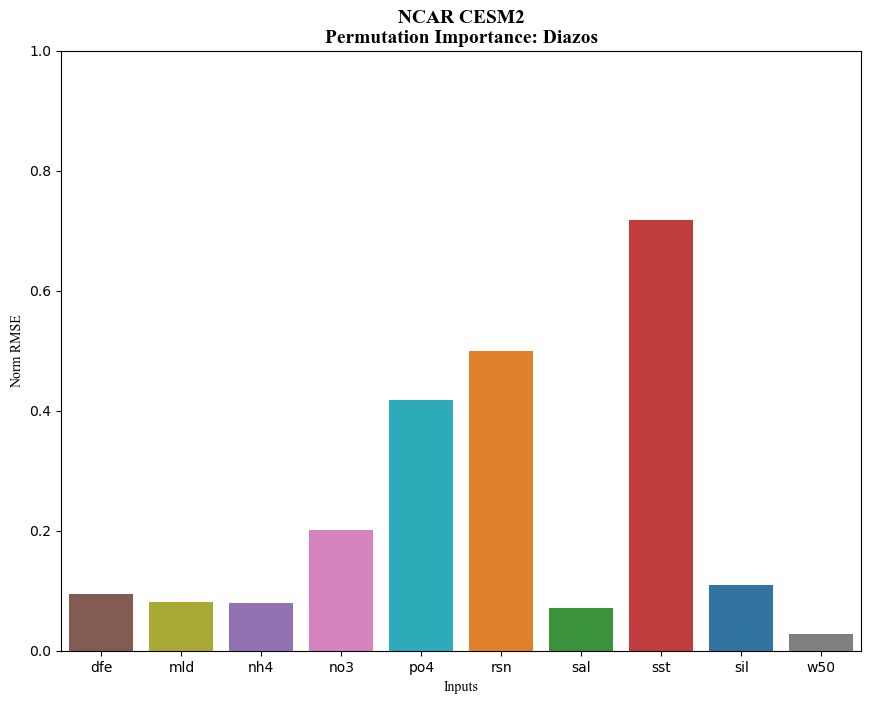

In [85]:
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_axes([0,0,1,1])
# font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
# fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
# sns.barplot(x='Inputs', y='NormRMSE', data=per_diazos, ax=ax, palette=my_colors)
# ax.set_title("NCAR CESM2\nPermutation Importance: Diazos", fontdict=font)
# ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
# ax.set_ylim([0.0, 1.0])
# ax.set_xlabel("Inputs",fontdict=fonttxt)
# fig.savefig(chartpath + "PI_cesm2_diazos.jpg", dpi=200,bbox_inches='tight')

#### Permutation Importance Phypicoos

In [ ]:
# result = permutation_importance(rfpicoos, Xs_test, ypicoos_test, n_repeats=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
# Importances = result['importances_mean']
# per_picoos = pd.DataFrame({'Inputs':X.columns, 'RMSE':Importances})
# # joblib.dump(per_picoos, filepath + 'pi_cesm2_picoos.pkl')
# # per_picoos = joblib.load(filepath + 'pi_cesm2_picoos.pkl')
# per_picoos['NormRMSE'] = per_picoos['RMSE']/ypicoos_test.std()
# per_picoos

In [42]:
per_picoos = permutation_importance(model_pico, Xs, ypicoos)

In [92]:
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_axes([0,0,1,1])
# font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
# fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
# sns.barplot(x='Inputs', y='NormRMSE', data=per_picoos, ax=ax, palette=my_colors)
# plt.title('NCAR CESM2\nPermutation Importance: Picoplankton', fontdict=font)
# ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
# # ax.set_ylim([0.0, 1.0])
# ax.set_xlabel("Inputs",fontdict=fonttxt)
# fig.savefig(chartpath + 'PI_cesm2_picoos.jpg', dpi=200, bbox_inches='tight')

#### Permutation Importance Total Phytoplankton

In [ ]:
# result = permutation_importance(model_phyc, Xs_test, yphyc_test, n_repeats=30, scoring='neg_root_mean_squared_error', n_jobs=-1)
# Importances = result['importances_mean']
# per_phyc = pd.DataFrame({'Inputs':X.columns, 'RMSE':Importances})
# # joblib.dump(per_picoos, filepath + 'pi_cesm2_picoos.pkl')
# # per_picoos = joblib.load(filepath + 'pi_cesm2_picoos.pkl')
# per_phyc['NormRMSE'] = per_phyc['RMSE']/yphyc_test.std()
# per_phyc

In [43]:
per_phyc = permutation_importance(model_phyc, Xs, yphyc)

In [93]:
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_axes([0,0,1,1])
# font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
# fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
# sns.barplot(x='Inputs', y='NormRMSE', data=per_phyc, ax=ax, palette=my_colors)
# ax.set_title('NCAR CESM2\nPermutation Importance: Total Phytoplankton', fontdict=font)
# ax.set_ylabel("Norm RMSE",fontdict=fonttxt)
# # ax.set_ylim([0.0, 1.0])
# ax.set_xlabel("Inputs",fontdict=fonttxt)
# fig.savefig(chartpath + 'PI_cesm2_phyc.jpg', dpi=200, bbox_inches='tight')

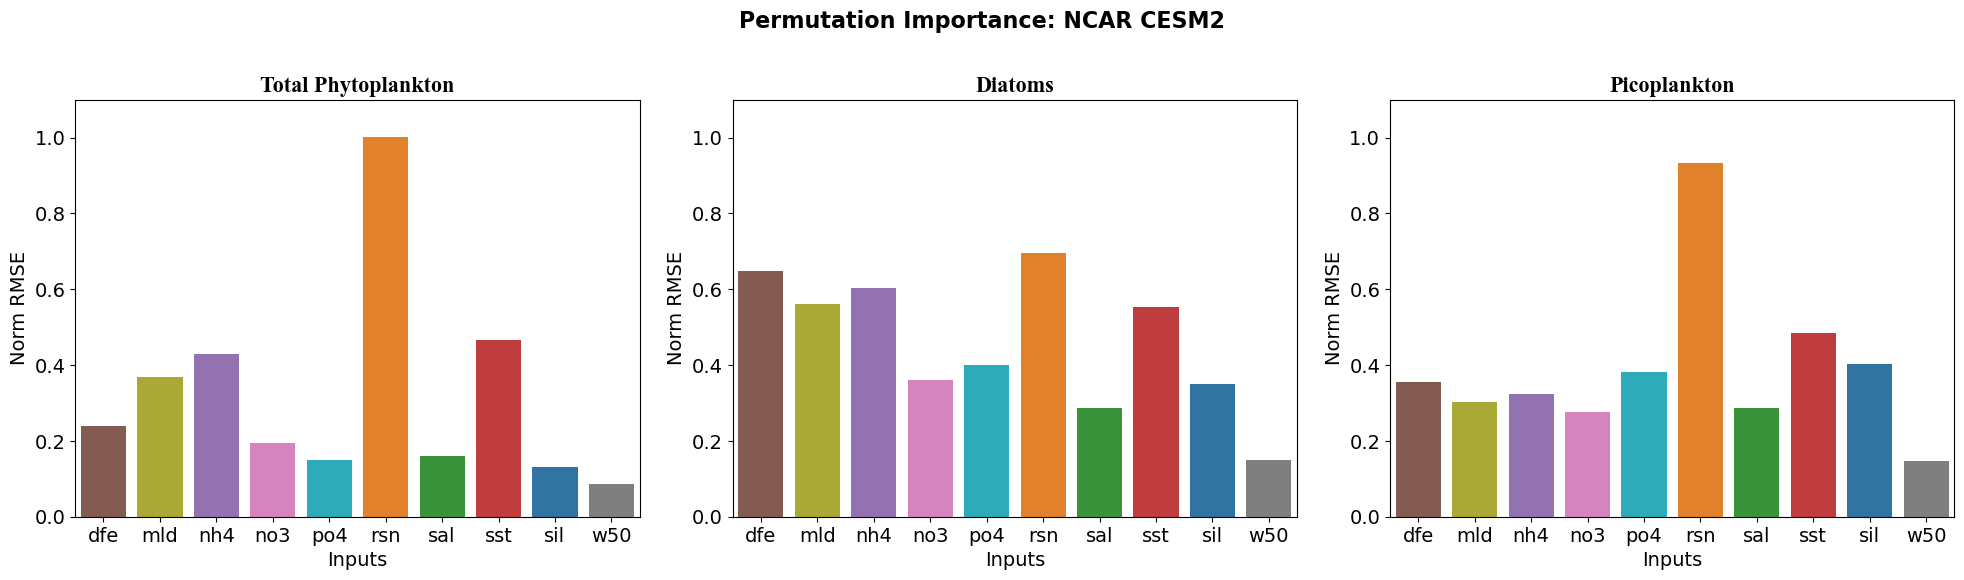

In [49]:
# Assuming per_phyc, per_diatos, per_picoos, and my_colors are pre-defined
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=False, dpi=100)
fig.suptitle("Permutation Importance: NCAR CESM2", fontsize=16, fontweight='bold')

# Plotting the barplots
sns.barplot(x='Inputs', y='norm_rmse', data=per_phyc, ax=ax[0], palette=my_colors)
sns.barplot(x='Inputs', y='norm_rmse', data=per_diatos, ax=ax[1], palette=my_colors)
sns.barplot(x='Inputs', y='norm_rmse', data=per_picoos, ax=ax[2], palette=my_colors)

# Setting y-limits for all axes
for a in ax:
    a.set_ylim([0.0, 1.1])
    a.set_xlabel("Inputs", fontsize=14)
    a.set_ylabel("Norm RMSE", fontsize=14)
    a.xaxis.set_tick_params(labelsize=14)
    a.yaxis.set_tick_params(labelsize=14)

# Applying titles
font = {'family': 'Times New Roman', 'color': 'black', 'fontsize': 16, 'fontweight': 'bold'}
ax[0].set_title("Total Phytoplankton", fontdict=font)
ax[1].set_title("Diatoms", fontdict=font)
ax[2].set_title("Picoplankton", fontdict=font)

# Adjust space between figure title and subplots
fig.subplots_adjust(top=0.90)  # Adjust the top space for the super title

# Apply layout adjustments
plt.tight_layout(pad=2.0)

# Save the figure before displaying
fig.savefig(chartpath + 'PI_cesm2_composite.jpg', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

### ALE

In [112]:
def compute_ale(X, model, feature, n_quantiles=100, scaler=None):
    """
    Compute Accumulated Local Effects (ALE) for a single feature.
    
    Parameters:
    - X: pd.DataFrame, input data
    - model: trained model with .predict() method
    - feature: str, name of the feature to compute ALE for
    - bins: int, number of bins to divide the feature range
    
    Returns:
    - ale_df: pd.DataFrame with columns ['bin_center', 'ALE']
    """
    x_feature = X[feature].values
    
    # Use quantiles as cut points
    quantiles = np.quantile(x_feature, np.linspace(0, 1, n_quantiles + 1))
    quantiles = np.unique(quantiles)  # ensure uniqueness
    
    ale_values = []
    bin_centers = []
    
    for i in range(1, len(quantiles)):
        lower, upper = quantiles[i-1], quantiles[i]
        mask = (x_feature >= lower) & (x_feature < upper)
        X_bin = X[mask].copy()
        
        if len(X_bin) == 0:
            ale_values.append(0)
            bin_centers.append((lower + upper) / 2)
            continue
        
        # Predict with feature = upper
        X_bin[feature] = upper
        preds_upper = model.predict(X_bin)
        
        # Predict with feature = lower
        X_bin[feature] = lower
        preds_lower = model.predict(X_bin)
        
        # Average difference
        delta = np.mean(preds_upper - preds_lower)
        
        ale_values.append(delta)
        bin_centers.append((lower + upper) / 2)
    
    # Accumulate effects
    ale_cum = np.cumsum(ale_values) 
    
    # # Center ALE to have mean zero
    # ale_cum -= np.mean(ale_cum)

    # Center ALE around median instead of mean
    ale_cum -= np.median(ale_cum)
    
    ale_df = pd.DataFrame({
        "bin_center": bin_centers,
        "ALE": ale_cum
    })
    # === Inverse transform to original scale ===
    if scaler is not None:
        feature_idx = list(X.columns).index(feature)
        tmp = np.zeros((len(ale_df), X.shape[1]))
        tmp[:, feature_idx] = ale_df["bin_center"].values
        ale_df["bin_center"] = scaler.inverse_transform(tmp)[:, feature_idx]
    
    return ale_df

In [113]:
ale_phyc_sst = compute_ale(Xs, model_phyc, 'sst', n_quantiles=100, scaler=scaler)
ale_diat_sst = compute_ale(Xs, model_diat, 'sst', n_quantiles=100, scaler=scaler)
ale_pico_sst = compute_ale(Xs, model_pico, 'sst', n_quantiles=100, scaler=scaler)

In [114]:
ale_phyc_dfe = compute_ale(Xs, model_phyc, 'dfe', n_quantiles=100, scaler=scaler)
ale_diat_dfe = compute_ale(Xs, model_diat, 'dfe', n_quantiles=100, scaler=scaler)
ale_pico_dfe = compute_ale(Xs, model_pico, 'dfe', n_quantiles=100, scaler=scaler)

In [115]:
ale_phyc_rsn = compute_ale(Xs, model_phyc, 'rsn', n_quantiles=100, scaler=scaler)
ale_diat_rsn = compute_ale(Xs, model_diat, 'rsn', n_quantiles=100, scaler=scaler)
ale_pico_rsn = compute_ale(Xs, model_pico, 'rsn', n_quantiles=100, scaler=scaler)

In [116]:
ale_phyc_nh4 = compute_ale(Xs, model_phyc, 'nh4', n_quantiles=100, scaler=scaler)
ale_diat_nh4 = compute_ale(Xs, model_diat, 'nh4', n_quantiles=100, scaler=scaler)
ale_pico_nh4 = compute_ale(Xs, model_pico, 'nh4', n_quantiles=100, scaler=scaler)

In [117]:
ale_phyc_sst

,bin_center,ALE
0,-1.916524,0.059463
1,-1.879382,0.069000
2,-1.867163,0.081706
3,-1.851132,0.093200
4,-1.831688,0.099768
...,...,...
95,29.466336,-0.217530
96,29.676884,-0.218141
97,29.909283,-0.218678
98,30.191475,-0.220179


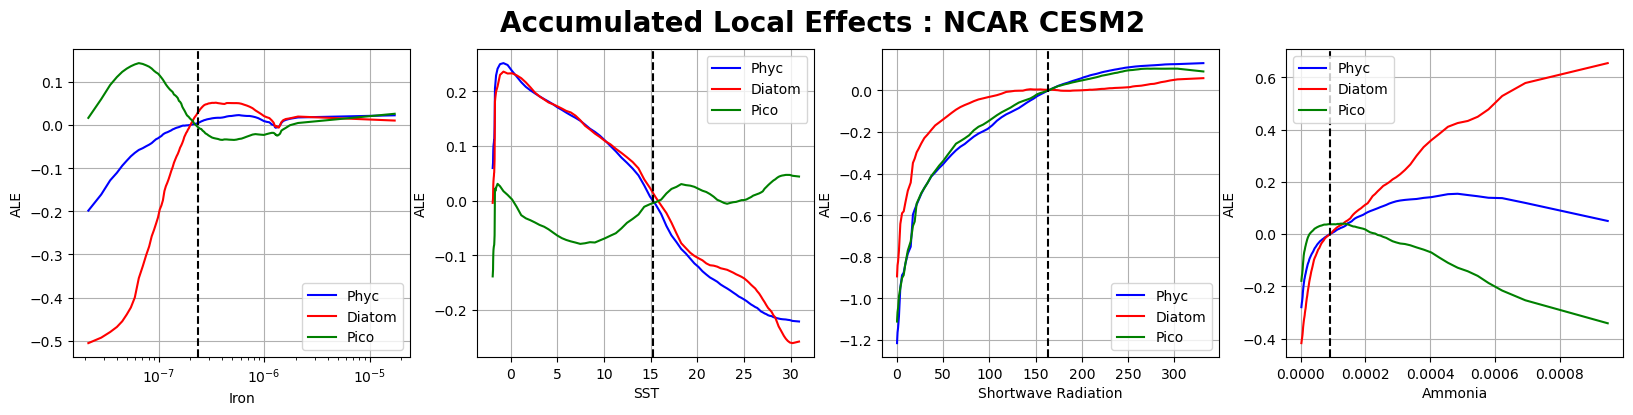

In [121]:
fig, ax = plt.subplots(1,4, figsize=(20,4), sharey=False, dpi=100)
fig.suptitle("Accumulated Local Effects : NCAR CESM2", fontsize=16, fontweight='bold')

# Calculate the median of the x-axis feature
median_sst = ale_phyc_sst['bin_center'].median()
median_rsn = ale_phyc_rsn['bin_center'].median()
median_dfe = ale_phyc_dfe['bin_center'].median()
median_nh4 = ale_phyc_nh4['bin_center'].median()

# Plotting
ax[0].plot(ale_phyc_dfe['bin_center'], ale_phyc_dfe['ALE'], color='blue', label='Phyc')
ax[0].plot(ale_diat_dfe['bin_center'], ale_diat_dfe['ALE'], color='red', label='Diatom')
ax[0].plot(ale_pico_dfe['bin_center'], ale_pico_dfe['ALE'], color='green', label='Pico')

ax[1].plot(ale_phyc_sst['bin_center'], ale_phyc_sst['ALE'], color='blue', label='Phyc')
ax[1].plot(ale_diat_sst['bin_center'], ale_diat_sst['ALE'], color='red', label='Diatom')
ax[1].plot(ale_pico_sst['bin_center'], ale_pico_sst['ALE'], color='green', label='Pico')

ax[2].plot(ale_phyc_rsn['bin_center'], ale_phyc_rsn['ALE'], color='blue', label='Phyc')
ax[2].plot(ale_diat_rsn['bin_center'], ale_diat_rsn['ALE'], color='red', label='Diatom')
ax[2].plot(ale_pico_rsn['bin_center'], ale_pico_rsn['ALE'], color='green', label='Pico')

ax[3].plot(ale_phyc_nh4['bin_center'], ale_phyc_nh4['ALE'], color='blue', label='Phyc')
ax[3].plot(ale_diat_nh4['bin_center'], ale_diat_nh4['ALE'], color='red', label='Diatom')
ax[3].plot(ale_pico_nh4['bin_center'], ale_pico_nh4['ALE'], color='green', label='Pico')

# Set x-axis to log scale for Iron (ax[0])
ax[0].set_xscale('log', base=10)

# Add a vertical line at the median value
ax[0].axvline(x=median_dfe, color='k', linestyle='--')
ax[1].axvline(x=median_sst, color='k', linestyle='--')
ax[2].axvline(x=median_rsn, color='k', linestyle='--')
ax[3].axvline(x=median_nh4, color='k', linestyle='--')

ax[0].set_xlabel('Iron')
ax[1].set_xlabel('SST')
ax[2].set_xlabel('Shortwave Radiation')
ax[3].set_xlabel('Ammonia')

ax[0].set_ylabel('ALE')
ax[1].set_ylabel('ALE')
ax[2].set_ylabel('ALE')
ax[3].set_ylabel('ALE')

# ax[0].set_ylim([-0.9, 0.9])
# ax[1].set_ylim([-0.5, 0.6])
# ax[2].set_ylim([-0.9, 0.3])
# ax[3].set_ylim([-0.5, 0.6])

ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
ax[3].grid(True)

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

# fig.savefig(chartpath + "ale_pico_scaled_scratch.jpg", dpi=200, bbox_inches="tight")
plt.show()

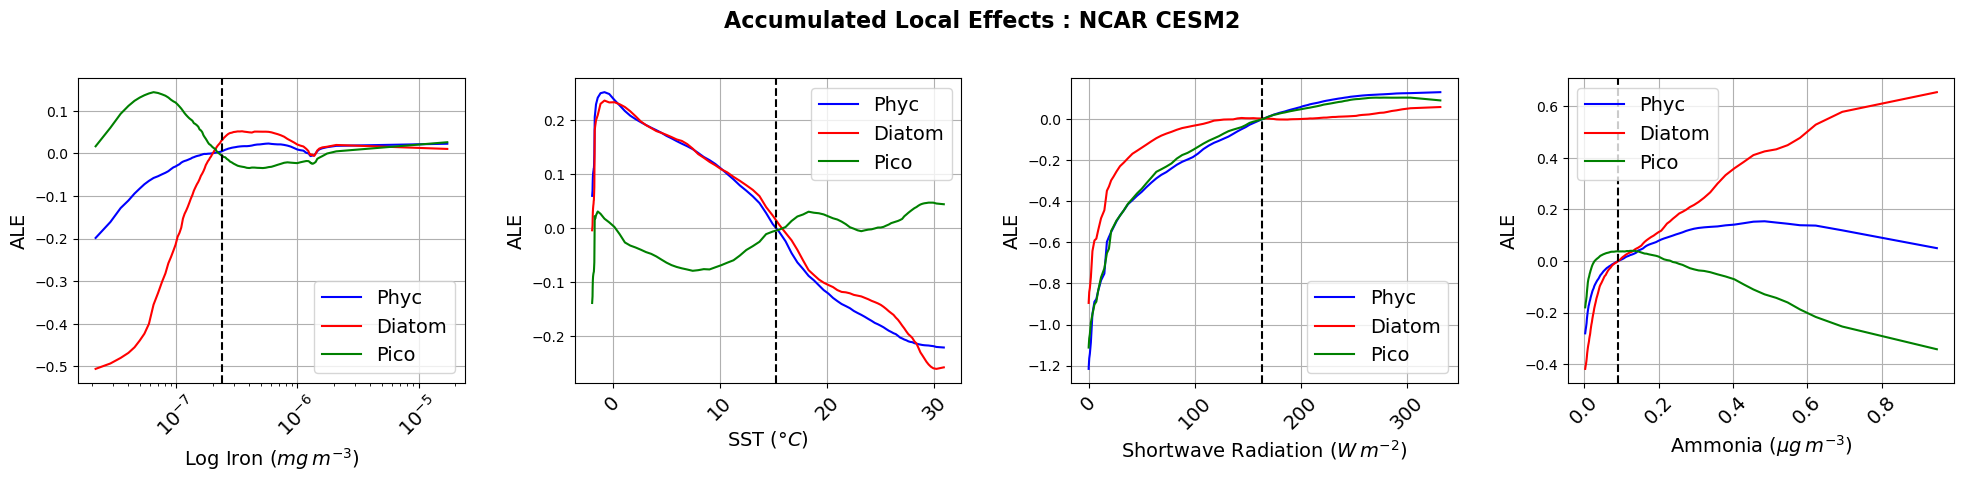

In [137]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=False, dpi=100)
fig.suptitle("Accumulated Local Effects : NCAR CESM2", fontsize=16, fontweight='bold')

# Define features and their ALE results
features = [
    ("Log Iron (${mg}\\,{m^{-3}}$)",   [ale_phyc_dfe, ale_diat_dfe, ale_pico_dfe], "log"),
    ("SST ($\\degree C$)",    [ale_phyc_sst, ale_diat_sst, ale_pico_sst], None),
    ("Shortwave Radiation (${W}\\,{m^{-2}}$)", [ale_phyc_rsn, ale_diat_rsn, ale_pico_rsn], None),
    ("Ammonia (${\\mu g}\\,{m^{-3}}$)", [ale_phyc_nh4, ale_diat_nh4, ale_pico_nh4], None),
]

# Colors & labels
colors = ["blue", "red", "green"]
labels = ["Phyc", "Diatom", "Pico"]

for i, (xlabel, ale_list, xscale) in enumerate(features):
    # Plot ALE curves
    for ale_df, color, label in zip(ale_list, colors, labels):
        ax[i].plot(ale_df["bin_center"], ale_df["ALE"], color=color, label=label)
    
    # Set x-scale if needed
    if xscale == "log":
        ax[i].set_xscale("log", base=10)

    # Add vertical median line (median of first ALE dataset, e.g., Phyc)
    median_val = ale_list[0]["bin_center"].median()
    ax[i].axvline(x=median_val, color="k", linestyle="--")

    # Special formatting for Ammonia axis (last subplot, index 3)
    if xlabel == "Ammonia (${\\mu g}\\,{m^{-3}}$)":
        ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x*1e3:.1f}"))
        ax[i].set_xlabel("Ammonia (×1e-3)")
    
    # Labels, grid, legend
    ax[i].set_xlabel(xlabel, fontsize=14)
    ax[i].set_ylabel("ALE", fontsize=14)
    ax[i].tick_params(axis='x', labelrotation=45, labelsize=14)
    ax[i].legend(loc='best', fontsize=14)
    ax[i].grid(True)

# Adjust the layout
plt.tight_layout(pad=2.0, w_pad=3.0, h_pad=None)

fig.savefig(chartpath + "ale_ncarcesm2_scratch.jpg", dpi=200, bbox_inches="tight")
plt.show()

### Median Sensitivity Analysis
One variable kept at median values and others kept at original values.

In [45]:
X.head()

,,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
nlat,nlon,,,,,,,,,,
152,148,1.130664e-06,34.542698,0.000077,0.000430,0.000328,231.48590,0.006632,33.123478,28.663721,4.767621e-07
368,54,7.788323e-07,75.981026,0.000076,0.005052,0.000551,56.09651,0.003754,34.335403,2.077963,7.503082e-07
58,316,1.452367e-07,69.402230,0.000443,0.015329,0.001220,128.84460,0.022280,33.511684,6.184731,-2.684864e-07
28,9,1.931367e-07,65.930070,0.000191,0.021310,0.001571,39.25426,0.049474,33.457720,-1.443400,9.552945e-07
52,245,1.530400e-07,130.647670,0.000248,0.016194,0.001253,93.25823,0.024805,33.652485,5.769375,1.333374e-07


In [72]:
Xs = scaler.transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)
Xs.head()

,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
0,0.127255,1.214077,1.834973,0.573958,0.979619,7.237764,0.086009,8.093882,7.046799,6.031416
1,0.017475,1.085554,5.939110,1.595883,3.020254,9.707664,0.123576,8.085529,8.817873,5.991359
2,0.006574,1.210948,3.463432,1.415267,1.734869,6.837828,0.422322,8.065038,6.144602,6.010868
3,0.016258,1.052613,1.506220,0.471168,0.841788,6.931327,0.149155,8.082940,6.656231,6.018233
4,0.428215,0.833479,0.797854,0.161440,0.545981,8.790724,0.620369,8.355513,9.054205,6.083621


In [47]:
df.head()

,,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50,phydiatos,phydiazos,phypicoos,phyc,logdiatos,logdiazos,logpicoos,logphyc
nlat,nlon,,,,,,,,,,,,,,,,,,
152,148,1.130664e-06,34.542698,0.000077,0.000430,0.000328,231.48590,0.006632,33.123478,28.663721,4.767621e-07,0.000501,0.000050,0.000405,0.000906,-3.300277,-4.298970,-3.392317,-3.042834
368,54,7.788323e-07,75.981026,0.000076,0.005052,0.000551,56.09651,0.003754,34.335403,2.077963,7.503082e-07,0.003210,0.000036,0.000125,0.003336,-2.493486,-4.447462,-3.901536,-2.476837
58,316,1.452367e-07,69.402230,0.000443,0.015329,0.001220,128.84460,0.022280,33.511684,6.184731,-2.684864e-07,0.000648,0.000036,0.000460,0.001107,-3.188561,-4.447462,-3.337623,-2.955698
28,9,1.931367e-07,65.930070,0.000191,0.021310,0.001571,39.25426,0.049474,33.457720,-1.443400,9.552945e-07,0.000110,0.000036,0.000725,0.000834,-3.959738,-4.447462,-3.139951,-3.078713
52,245,1.530400e-07,130.647670,0.000248,0.016194,0.001253,93.25823,0.024805,33.652485,5.769375,1.333374e-07,0.000092,0.000036,0.000713,0.000806,-4.034697,-4.447462,-3.146694,-3.093839


In [48]:
re_orig={}
r2_orig={}
rn_orig={}

In [49]:
ydiatos_pred = model_diatos.predict(Xs)
re = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
rn = re/ydiatos.std()
r2 = r2_score(ydiatos, ydiatos_pred)
re_orig['diatos']=re
rn_orig['diatos']=rn
r2_orig['diatos']=r2

In [50]:
ydiazos_pred = model_diazos.predict(Xs)
re = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
rn = re/ydiazos.std()
r2 = r2_score(ydiazos, ydiazos_pred)
re_orig['diazos']=re
rn_orig['diazos']=rn
r2_orig['diazos']=r2

In [51]:
ypicoos_pred = model_picoos.predict(Xs)
re = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
rn = re/ypicoos.std()
r2 = r2_score(ypicoos, ypicoos_pred)
re_orig['picoos']=re
rn_orig['picoos']=rn
r2_orig['picoos']=r2

In [52]:
yphyc_pred = model_phyc.predict(Xs)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_orig['phyc']=re
rn_orig['phyc']=rn
r2_orig['phyc']=r2

#### Sensitivity Iron

In [53]:
re_dfe = {}
rn_dfe = {}
r2_dfe = {}

In [54]:
X5dfe = Xs.copy(deep=True)
for col in X5dfe.columns:
    if col == 'dfe':
        X5dfe[col] = X5dfe[col].quantile(q=0.5, interpolation='linear')
    else:
        X5dfe[col] = X5dfe[col]

In [55]:
X5dfe.head()

,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
0,0.070029,0.596524,1.269950,0.236330,1.834487,8.507214,1.062781,7.548321,9.313374,4.429722
1,0.070029,1.389224,1.262786,2.298513,3.103860,2.056563,0.490704,7.897349,1.211090,4.441361
2,0.070029,1.263374,7.533875,6.883586,6.910318,4.732167,4.172153,7.660122,2.462670,4.398015
3,0.070029,1.196953,3.220467,9.552193,8.907742,1.437122,9.576032,7.644581,0.137919,4.450082
4,0.070029,2.434976,4.205289,7.269548,7.098203,3.423335,4.673999,7.700672,2.336086,4.415111


In [56]:
ydiatos_pred = model_diatos.predict(X5dfe)
re = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
rn = re/ydiatos.std()
r2 = r2_score(ydiatos, ydiatos_pred)
re_dfe['diatos']=re
rn_dfe['diatos']=rn
r2_dfe['diatos']=r2

In [57]:
ydiazos_pred = model_diazos.predict(X5dfe)
re = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
rn = re/ydiazos.std()
r2 = r2_score(ydiazos, ydiazos_pred)
re_dfe['diazos']=re
rn_dfe['diazos']=rn
r2_dfe['diazos']=r2

In [58]:
ypicoos_pred = model_picoos.predict(X5dfe)
re = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
rn = re/ypicoos.std()
r2 = r2_score(ypicoos, ypicoos_pred)
re_dfe['picoos']=re
rn_dfe['picoos']=rn
r2_dfe['picoos']=r2

In [59]:
yphyc_pred = model_phyc.predict(X5dfe)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_dfe['phyc']=re
rn_dfe['phyc']=rn
r2_dfe['phyc']=r2

#### Sensitivity MLD

In [60]:
re_mld = {}
rn_mld = {}
r2_mld = {}

In [61]:
X5mld = Xs.copy(deep=True)
for col in X5mld.columns:
    if col == 'mld':
        X5mld[col] = X5mld[col].quantile(q=0.5, interpolation='linear')
    else:
        X5mld[col] = X5mld[col]

In [62]:
X5mld.head()

,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
0,0.345291,0.938654,1.269950,0.236330,1.834487,8.507214,1.062781,7.548321,9.313374,4.429722
1,0.235865,0.938654,1.262786,2.298513,3.103860,2.056563,0.490704,7.897349,1.211090,4.441361
2,0.038805,0.938654,7.533875,6.883586,6.910318,4.732167,4.172153,7.660122,2.462670,4.398015
3,0.053702,0.938654,3.220467,9.552193,8.907742,1.437122,9.576032,7.644581,0.137919,4.450082
4,0.041231,0.938654,4.205289,7.269548,7.098203,3.423335,4.673999,7.700672,2.336086,4.415111


In [63]:
ydiatos_pred = model_diatos.predict(X5mld)
re = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
rn = re/ydiatos.std()
r2 = r2_score(ydiatos, ydiatos_pred)
re_mld['diatos']=re
rn_mld['diatos']=rn
r2_mld['diatos']=r2

In [64]:
ydiazos_pred = model_diazos.predict(X5mld)
re = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
rn = re/ydiazos.std()
r2 = r2_score(ydiazos, ydiazos_pred)
re_mld['diazos']=re
rn_mld['diazos']=rn
r2_mld['diazos']=r2

In [65]:
ypicoos_pred = model_picoos.predict(X5mld)
re = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
rn = re/ypicoos.std()
r2 = r2_score(ypicoos, ypicoos_pred)
re_mld['picoos']=re
rn_mld['picoos']=rn
r2_mld['picoos']=r2

In [66]:
yphyc_pred = model_phyc.predict(X5mld)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_mld['phyc']=re
rn_mld['phyc']=rn
r2_mld['phyc']=r2

#### Sensitivity $NH_4$

In [67]:
re_nh4 = {}
rn_nh4 = {}
r2_nh4 = {}

In [68]:
X5nh4 = Xs.copy(deep=True)
for col in X5nh4.columns:
    if col == 'nh4':
        X5nh4[col] = X5nh4[col].quantile(q=0.5, interpolation='linear')
    else:
        X5nh4[col] = X5nh4[col]

In [69]:
X5nh4.head()

,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
0,0.345291,0.596524,2.150692,0.236330,1.834487,8.507214,1.062781,7.548321,9.313374,4.429722
1,0.235865,1.389224,2.150692,2.298513,3.103860,2.056563,0.490704,7.897349,1.211090,4.441361
2,0.038805,1.263374,2.150692,6.883586,6.910318,4.732167,4.172153,7.660122,2.462670,4.398015
3,0.053702,1.196953,2.150692,9.552193,8.907742,1.437122,9.576032,7.644581,0.137919,4.450082
4,0.041231,2.434976,2.150692,7.269548,7.098203,3.423335,4.673999,7.700672,2.336086,4.415111


In [70]:
ydiatos_pred = model_diatos.predict(X5nh4)
re = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
rn = re/ydiatos.std()
r2 = r2_score(ydiatos, ydiatos_pred)
re_nh4['diatos']=re
rn_nh4['diatos']=rn
r2_nh4['diatos']=r2

In [71]:
ydiazos_pred = model_diazos.predict(X5nh4)
re = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
rn = re/ydiazos.std()
r2 = r2_score(ydiazos, ydiazos_pred)
re_nh4['diazos']=re
rn_nh4['diazos']=rn
r2_nh4['diazos']=r2

In [72]:
ypicoos_pred = model_picoos.predict(X5nh4)
re = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
rn = re/ypicoos.std()
r2 = r2_score(ypicoos, ypicoos_pred)
re_nh4['picoos']=re
rn_nh4['picoos']=rn
r2_nh4['picoos']=r2

In [73]:
yphyc_pred = model_phyc.predict(X5nh4)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_nh4['phyc']=re
rn_nh4['phyc']=rn
r2_nh4['phyc']=r2

#### Sensitivity $NO_3$

In [74]:
re_no3 = {}
rn_no3 = {}
r2_no3 = {}

In [75]:
X5no3 = Xs.copy(deep=True)
for col in X5no3.columns:
    if col == 'no3':
        X5no3[col] = X5no3[col].quantile(q=0.5, interpolation='linear')
    else:
        X5no3[col] = X5no3[col]

In [76]:
X5no3.head()

,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
0,0.345291,0.596524,1.269950,0.987671,1.834487,8.507214,1.062781,7.548321,9.313374,4.429722
1,0.235865,1.389224,1.262786,0.987671,3.103860,2.056563,0.490704,7.897349,1.211090,4.441361
2,0.038805,1.263374,7.533875,0.987671,6.910318,4.732167,4.172153,7.660122,2.462670,4.398015
3,0.053702,1.196953,3.220467,0.987671,8.907742,1.437122,9.576032,7.644581,0.137919,4.450082
4,0.041231,2.434976,4.205289,0.987671,7.098203,3.423335,4.673999,7.700672,2.336086,4.415111


In [77]:
ydiatos_pred = model_diatos.predict(X5no3)
re = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
rn = re/ydiatos.std()
r2 = r2_score(ydiatos, ydiatos_pred)
re_no3['diatos']=re
rn_no3['diatos']=rn
r2_no3['diatos']=r2

In [78]:
ydiazos_pred = model_diazos.predict(X5no3)
re = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
rn = re/ydiazos.std()
r2 = r2_score(ydiazos, ydiazos_pred)
re_no3['diazos']=re
rn_no3['diazos']=rn
r2_no3['diazos']=r2

In [79]:
ypicoos_pred = model_picoos.predict(X5no3)
re = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
rn = re/ypicoos.std()
r2 = r2_score(ypicoos, ypicoos_pred)
re_no3['picoos']=re
rn_no3['picoos']=rn
r2_no3['picoos']=r2

In [80]:
yphyc_pred = model_phyc.predict(X5no3)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_no3['phyc']=re
rn_no3['phyc']=rn
r2_no3['phyc']=r2

#### Sensitivity $PO_4$

In [81]:
re_po4 = {}
rn_po4 = {}
r2_po4 = {}

In [82]:
X5po4 = Xs.copy(deep=True)
for col in X5po4.columns:
    if col == 'po4':
        X5po4[col] = X5po4[col].quantile(q=0.5, interpolation='linear')
    else:
        X5po4[col] = X5po4[col]

In [83]:
X5po4.head()

,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
0,0.345291,0.596524,1.269950,0.236330,2.17946,8.507214,1.062781,7.548321,9.313374,4.429722
1,0.235865,1.389224,1.262786,2.298513,2.17946,2.056563,0.490704,7.897349,1.211090,4.441361
2,0.038805,1.263374,7.533875,6.883586,2.17946,4.732167,4.172153,7.660122,2.462670,4.398015
3,0.053702,1.196953,3.220467,9.552193,2.17946,1.437122,9.576032,7.644581,0.137919,4.450082
4,0.041231,2.434976,4.205289,7.269548,2.17946,3.423335,4.673999,7.700672,2.336086,4.415111


In [84]:
ydiatos_pred = model_diatos.predict(X5po4)
re = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
rn = re/ydiatos.std()
r2 = r2_score(ydiatos, ydiatos_pred)
re_po4['diatos']=re
rn_po4['diatos']=rn
r2_po4['diatos']=r2

In [85]:
ydiazos_pred = model_diazos.predict(X5po4)
re = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
rn = re/ydiazos.std()
r2 = r2_score(ydiazos, ydiazos_pred)
re_po4['diazos']=re
rn_po4['diazos']=rn
r2_po4['diazos']=r2

In [86]:
ypicoos_pred = model_picoos.predict(X5po4)
re = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
rn = re/ypicoos.std()
r2 = r2_score(ypicoos, ypicoos_pred)
re_po4['picoos']=re
rn_po4['picoos']=rn
r2_po4['picoos']=r2

In [87]:
yphyc_pred = model_phyc.predict(X5po4)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_po4['phyc']=re
rn_po4['phyc']=rn
r2_po4['phyc']=r2

#### Sensitivity Shortwave Radiation

In [88]:
re_rsn = {}
rn_rsn = {}
r2_rsn = {}

In [89]:
X5rsn = Xs.copy(deep=True)
for col in X5rsn.columns:
    if col == 'rsn':
        X5rsn[col] = X5rsn[col].quantile(q=0.5, interpolation='linear')
    else:
        X5rsn[col] = X5rsn[col]

In [90]:
X5rsn.head()

,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
0,0.345291,0.596524,1.269950,0.236330,1.834487,7.311468,1.062781,7.548321,9.313374,4.429722
1,0.235865,1.389224,1.262786,2.298513,3.103860,7.311468,0.490704,7.897349,1.211090,4.441361
2,0.038805,1.263374,7.533875,6.883586,6.910318,7.311468,4.172153,7.660122,2.462670,4.398015
3,0.053702,1.196953,3.220467,9.552193,8.907742,7.311468,9.576032,7.644581,0.137919,4.450082
4,0.041231,2.434976,4.205289,7.269548,7.098203,7.311468,4.673999,7.700672,2.336086,4.415111


In [91]:
ydiatos_pred = model_diatos.predict(X5rsn)
re = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
rn = re/ydiatos.std()
r2 = r2_score(ydiatos, ydiatos_pred)
re_rsn['diatos']=re
rn_rsn['diatos']=rn
r2_rsn['diatos']=r2

In [92]:
ydiazos_pred = model_diazos.predict(X5rsn)
re = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
rn = re/ydiazos.std()
r2 = r2_score(ydiazos, ydiazos_pred)
re_rsn['diazos']=re
rn_rsn['diazos']=rn
r2_rsn['diazos']=r2

In [93]:
ypicoos_pred = model_picoos.predict(X5rsn)
re = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
rn = re/ypicoos.std()
r2 = r2_score(ypicoos, ypicoos_pred)
re_rsn['picoos']=re
rn_rsn['picoos']=rn
r2_rsn['picoos']=r2

In [94]:
yphyc_pred = model_phyc.predict(X5rsn)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_rsn['phyc']=re
rn_rsn['phyc']=rn
r2_rsn['phyc']=r2

#### Sensitivity Silicate

In [95]:
re_sil = {}
rn_sil = {}
r2_sil = {}

In [96]:
X5sil = Xs.copy(deep=True)
for col in X5sil.columns:
    if col == 'sil':
        X5sil[col] = X5sil[col].quantile(q=0.5, interpolation='linear')
    else:
        X5sil[col] = X5sil[col]

In [97]:
X5sil.head()

,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
0,0.345291,0.596524,1.269950,0.236330,1.834487,8.507214,0.431344,7.548321,9.313374,4.429722
1,0.235865,1.389224,1.262786,2.298513,3.103860,2.056563,0.431344,7.897349,1.211090,4.441361
2,0.038805,1.263374,7.533875,6.883586,6.910318,4.732167,0.431344,7.660122,2.462670,4.398015
3,0.053702,1.196953,3.220467,9.552193,8.907742,1.437122,0.431344,7.644581,0.137919,4.450082
4,0.041231,2.434976,4.205289,7.269548,7.098203,3.423335,0.431344,7.700672,2.336086,4.415111


In [98]:
ydiatos_pred = model_diatos.predict(X5sil)
re = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
rn = re/ydiatos.std()
r2 = r2_score(ydiatos, ydiatos_pred)
re_sil['diatos']=re
rn_sil['diatos']=rn
r2_sil['diatos']=r2

In [99]:
ydiazos_pred = model_diazos.predict(X5sil)
re = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
rn = re/ydiazos.std()
r2 = r2_score(ydiazos, ydiazos_pred)
re_sil['diazos']=re
rn_sil['diazos']=rn
r2_sil['diazos']=r2

In [100]:
ypicoos_pred = model_picoos.predict(X5sil)
re = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
rn = re/ypicoos.std()
r2 = r2_score(ypicoos, ypicoos_pred)
re_sil['picoos']=re
rn_sil['picoos']=rn
r2_sil['picoos']=r2

In [101]:
yphyc_pred = model_phyc.predict(X5sil)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_sil['phyc']=re
rn_sil['phyc']=rn
r2_sil['phyc']=r2

#### Sensitivity Salinity

In [102]:
re_sal = {}
rn_sal = {}
r2_sal = {}

In [103]:
X5sal = Xs.copy(deep=True)
for col in X5sal.columns:
    if col == 'sal':
        X5sal[col] = X5sal[col].quantile(q=0.5, interpolation='linear')
    else:
        X5sal[col] = X5sal[col]

In [104]:
X5sal.head()

,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
0,0.345291,0.596524,1.269950,0.236330,1.834487,8.507214,1.062781,7.847292,9.313374,4.429722
1,0.235865,1.389224,1.262786,2.298513,3.103860,2.056563,0.490704,7.847292,1.211090,4.441361
2,0.038805,1.263374,7.533875,6.883586,6.910318,4.732167,4.172153,7.847292,2.462670,4.398015
3,0.053702,1.196953,3.220467,9.552193,8.907742,1.437122,9.576032,7.847292,0.137919,4.450082
4,0.041231,2.434976,4.205289,7.269548,7.098203,3.423335,4.673999,7.847292,2.336086,4.415111


In [105]:
ydiatos_pred = model_diatos.predict(X5sal)
re = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
rn = re/ydiatos.std()
r2 = r2_score(ydiatos, ydiatos_pred)
re_sal['diatos']=re
rn_sal['diatos']=rn
r2_sal['diatos']=r2

In [106]:
ydiazos_pred = model_diazos.predict(X5sal)
re = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
rn = re/ydiazos.std()
r2 = r2_score(ydiazos, ydiazos_pred)
re_sal['diazos']=re
rn_sal['diazos']=rn
r2_sal['diazos']=r2

In [107]:
ypicoos_pred = model_picoos.predict(X5sal)
re = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
rn = re/ypicoos.std()
r2 = r2_score(ypicoos, ypicoos_pred)
re_sal['picoos']=re
rn_sal['picoos']=rn
r2_sal['picoos']=r2

In [108]:
yphyc_pred = model_phyc.predict(X5sal)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_sal['phyc']=re
rn_sal['phyc']=rn
r2_sal['phyc']=r2

#### Sensitivity SST

In [109]:
re_sst = {}
rn_sst = {}
r2_sst = {}

In [110]:
X5sst = Xs.copy(deep=True)
for col in X5sst.columns:
    if col == 'sst':
        X5sst[col] = X5sst[col].quantile(q=0.5, interpolation='linear')
    else:
        X5sst[col] = X5sst[col]

In [111]:
X5sst.head()

,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
0,0.345291,0.596524,1.269950,0.236330,1.834487,8.507214,1.062781,7.548321,7.114489,4.429722
1,0.235865,1.389224,1.262786,2.298513,3.103860,2.056563,0.490704,7.897349,7.114489,4.441361
2,0.038805,1.263374,7.533875,6.883586,6.910318,4.732167,4.172153,7.660122,7.114489,4.398015
3,0.053702,1.196953,3.220467,9.552193,8.907742,1.437122,9.576032,7.644581,7.114489,4.450082
4,0.041231,2.434976,4.205289,7.269548,7.098203,3.423335,4.673999,7.700672,7.114489,4.415111


In [112]:
ydiatos_pred = model_diatos.predict(X5sst)
re = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
rn = re/ydiatos.std()
r2 = r2_score(ydiatos, ydiatos_pred)
re_sst['diatos']=re
rn_sst['diatos']=rn
r2_sst['diatos']=r2

In [113]:
ydiazos_pred = model_diazos.predict(X5sst)
re = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
rn = re/ydiazos.std()
r2 = r2_score(ydiazos, ydiazos_pred)
re_sst['diazos']=re
rn_sst['diazos']=rn
r2_sst['diazos']=r2

In [114]:
ypicoos_pred = model_picoos.predict(X5sst)
re = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
rn = re/ypicoos.std()
r2 = r2_score(ypicoos, ypicoos_pred)
re_sst['picoos']=re
rn_sst['picoos']=rn
r2_sst['picoos']=r2

In [115]:
yphyc_pred = model_phyc.predict(X5sst)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_sst['phyc']=re
rn_sst['phyc']=rn
r2_sst['phyc']=r2

#### Sensitivity Upwelling

In [116]:
re_w50 = {}
rn_w50 = {}
r2_w50 = {}

In [117]:
X5w50 = Xs.copy(deep=True)
for col in X5w50.columns:
    if col == 'w50':
        X5w50[col] = X5w50[col].quantile(q=0.5, interpolation='linear')
    else:
        X5w50[col] = X5w50[col]

In [118]:
X5w50.head()

,dfe,mld,nh4,no3,po4,rsn,sil,sal,sst,w50
0,0.345291,0.596524,1.269950,0.236330,1.834487,8.507214,1.062781,7.548321,9.313374,4.400303
1,0.235865,1.389224,1.262786,2.298513,3.103860,2.056563,0.490704,7.897349,1.211090,4.400303
2,0.038805,1.263374,7.533875,6.883586,6.910318,4.732167,4.172153,7.660122,2.462670,4.400303
3,0.053702,1.196953,3.220467,9.552193,8.907742,1.437122,9.576032,7.644581,0.137919,4.400303
4,0.041231,2.434976,4.205289,7.269548,7.098203,3.423335,4.673999,7.700672,2.336086,4.400303


In [119]:
ydiatos_pred = model_diatos.predict(X5w50)
re = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
rn = re/ydiatos.std()
r2 = r2_score(ydiatos, ydiatos_pred)
re_w50['diatos']=re
rn_w50['diatos']=rn
r2_w50['diatos']=r2

In [120]:
ydiazos_pred = model_diazos.predict(X5w50)
re = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
rn = re/ydiazos.std()
r2 = r2_score(ydiazos, ydiazos_pred)
re_w50['diazos']=re
rn_w50['diazos']=rn
r2_w50['diazos']=r2

In [121]:
ypicoos_pred = model_picoos.predict(X5w50)
re = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
rn = re/ypicoos.std()
r2 = r2_score(ypicoos, ypicoos_pred)
re_w50['picoos']=re
rn_w50['picoos']=rn
r2_w50['picoos']=r2

In [122]:
yphyc_pred = model_phyc.predict(X5w50)
re = mean_squared_error(yphyc, yphyc_pred, squared=False)
rn = re/yphyc.std()
r2 = r2_score(yphyc, yphyc_pred)
re_w50['phyc']=re
rn_w50['phyc']=rn
r2_w50['phyc']=r2

In [123]:
rnorm_df = pd.DataFrame({'orig':rn_orig,'dfe':rn_dfe, 'mld':rn_mld,'nh4':rn_nh4,'no3':rn_no3,'po4':rn_po4, 'rsn':rn_rsn,
                         'sal':rn_sal,'sst':rn_sst,'sil':rn_sil, 'w50':rn_w50})

In [124]:
rmse_df =  pd.DataFrame({'orig':re_orig,'dfe':re_dfe, 'mld':re_mld,'nh4':re_nh4,'no3':re_no3,'po4':re_po4, 'rsn':re_rsn,
                         'sal':re_sal,'sst':re_sst,'sil':re_sil, 'w50':re_w50},
                        # index=['dfe','mld','nh4','no3','po4','rsn','sal','sst','sil','w50']
                       )

In [125]:
rnorm_df = rnorm_df.drop(['orig'], axis=1)
rnorm = rnorm_df.T 

In [126]:
rnorm

,diatos,diazos,picoos,phyc
dfe,0.670328,0.416194,0.554269,0.549647
mld,0.184059,0.307987,0.217418,0.226394
nh4,0.395465,0.385924,0.261895,0.474683
no3,0.474291,0.439022,0.357499,0.520402
po4,0.303683,0.760725,0.336452,0.286012
rsn,0.455883,0.781993,0.327761,0.637077
sal,0.261439,0.329771,0.349160,0.194285
sst,0.215252,0.867158,0.392367,0.319827
sil,0.391380,0.530083,0.434396,0.278630
w50,0.132111,0.273039,0.169480,0.149704


In [127]:
rmse_df = rmse_df.drop(['orig'], axis=1)
rmse = rmse_df.T 

In [128]:
rmse

,diatos,diazos,picoos,phyc
dfe,0.426051,0.222469,0.209534,0.146657
mld,0.116985,0.164629,0.082192,0.060407
nh4,0.251352,0.206288,0.099006,0.126655
no3,0.301452,0.234671,0.135148,0.138854
po4,0.193017,0.406631,0.127191,0.076314
rsn,0.289753,0.417999,0.123905,0.169985
sal,0.166167,0.176273,0.131995,0.051839
sst,0.136811,0.463523,0.148329,0.085336
sil,0.248755,0.283346,0.164217,0.074344
w50,0.083968,0.145948,0.064069,0.039944


In [129]:
# my_colors={'dfe':brown,'rsn':orange,'sst':red,'nh4':purple,'no3':pink,'mld':olive,
#            'sal':green,'w50':gray,'sil':blue, 'po4':cyan}

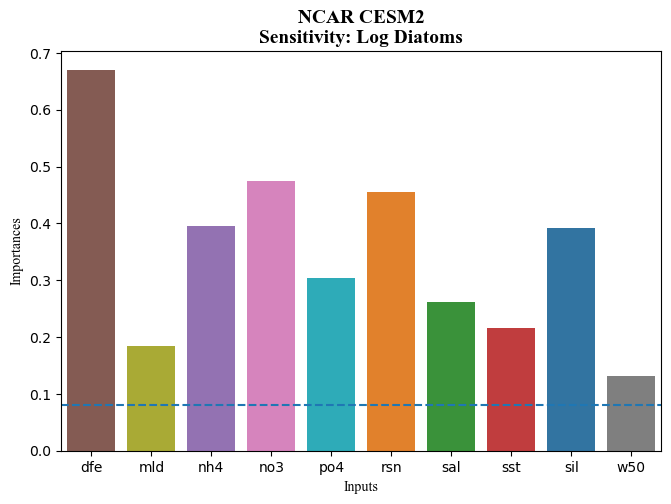

In [130]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
graph = sns.barplot(x=list(rnorm.index),y='diatos',data=rnorm, ax=ax, palette=my_colors)
graph.axhline(rn_orig['diatos'],ls='--')
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_title("NCAR CESM2\nSensitivity: Log Diatoms", fontdict=font)
ax.set_ylabel("Importances",fontdict=fonttxt)
ax.set_xlabel("Inputs",fontdict=fonttxt)
plt.show()
fig.savefig(chartpath + "ncar4cesm2_sensbar_diatoms.jpg",dpi=200,bbox_inches='tight')

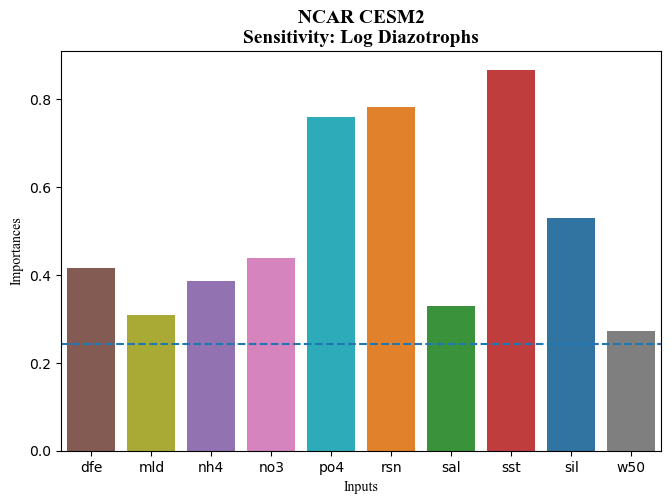

In [131]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
graph = sns.barplot(x=list(rnorm.index),y='diazos',data=rnorm, ax=ax, palette=my_colors)
graph.axhline(rn_orig['diazos'],ls='--')
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_title("NCAR CESM2\nSensitivity: Log Diazotrophs", fontdict=font)
ax.set_ylabel("Importances",fontdict=fonttxt)
ax.set_xlabel("Inputs",fontdict=fonttxt)
plt.show()
fig.savefig(chartpath + "ncar4cesm2_sensbar_diazos.jpg",dpi=200,bbox_inches='tight')

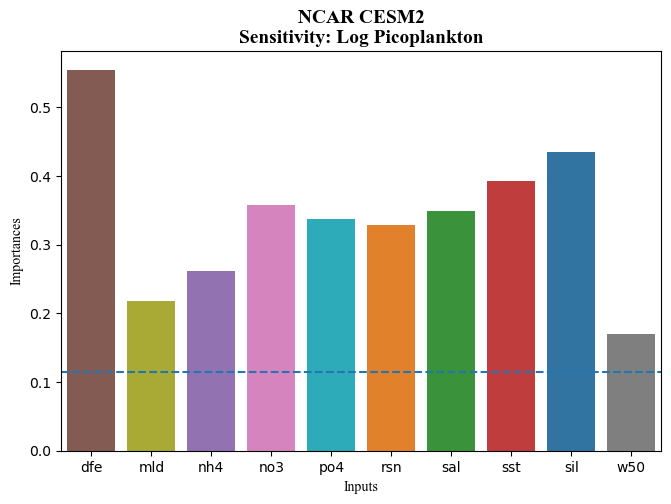

In [132]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
graph = sns.barplot(x=list(rnorm.index),y='picoos',data=rnorm, ax=ax, palette=my_colors)
graph.axhline(rn_orig['picoos'],ls='--')
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_title("NCAR CESM2\nSensitivity: Log Picoplankton", fontdict=font)
ax.set_ylabel("Importances",fontdict=fonttxt)
ax.set_xlabel("Inputs",fontdict=fonttxt)
plt.show()
fig.savefig(chartpath + "ncar4cesm2_sensbar_pico.jpg",dpi=200,bbox_inches='tight')

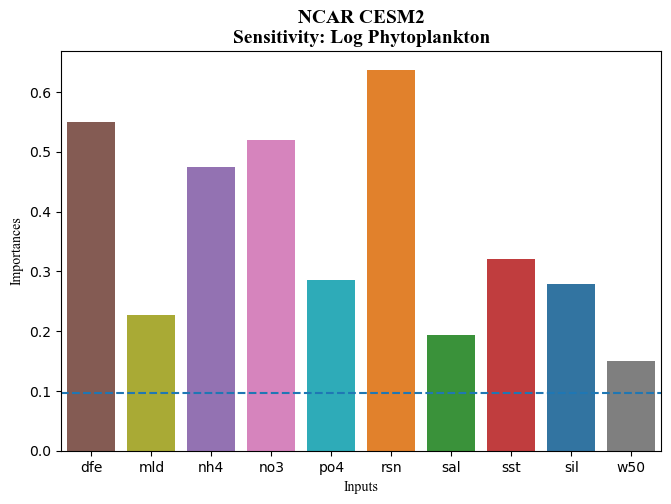

In [133]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_axes([0,0,1,1])
graph = sns.barplot(x=list(rnorm.index),y='phyc',data=rnorm, ax=ax, palette=my_colors)
graph.axhline(rn_orig['phyc'],ls='--')
font = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
fonttxt = {'family':'Times New Roman','color':'black','fontsize':10}
ax.set_title("NCAR CESM2\nSensitivity: Log Phytoplankton", fontdict=font)
ax.set_ylabel("Importances",fontdict=fonttxt)
ax.set_xlabel("Inputs",fontdict=fonttxt)
plt.show()
fig.savefig(chartpath + "ncar4cesm2_sensbar_phyc.jpg",dpi=200,bbox_inches='tight')

### Median Replacement Anomaly

In [86]:
def dataprep(X_df, feature, percentile=0.5):
    X_res = X_df.loc[:,X_df.columns!= feature]
    for col in range(X_res.shape[1]):
        X_res[X_res.columns[col]]= X_res[X_res.columns[col]].quantile(q=percentile, interpolation='linear')
        #X_res[col] = X_res[col].quantile(q=percentile, interpolation='linear')
    X_res= X_res.merge(X_df[feature], left_index=True, right_index=True)
    col_order = ['dfeos', 'mlotst', 'nh4os', 'no3os', 'po4os', 'rsntds', 'sios', 'sos', 'tos', 'wo']
    X_res = X_res.reindex(columns=col_order)
    return X_res

In [87]:
# Xs = scaler.transform(X)
# Xs = pd.DataFrame(Xs, columns=X.columns)
# Xs.head()

In [90]:
df['logdiat_pred'] = model_diat.predict(Xs)
# df['logdiaz_pred'] = model_diazos.predict(Xs)
df['logpico_pred'] = model_pico.predict(Xs)
df['logphyc_pred'] = model_phyc.predict(Xs)

In [75]:
def median_dataset(Xs, df, input, q=0.5):
    ''' The function takes a scaled input data and the original unscaled dataset.
    The specified input is replaced by 50th percentile of it's value and the model for the
    particular output is then used to do the prediction on the altered dataset. This is the median prediction.
    This prediction added to the original dataset against the original RF prediction for the respective output
    and coverted to an xarray dataset which is sorted by lat and lon. Returns a dataset with original input, output,
    original RF predictions and median RF prediction for the corressponding input and output'''
    # if isintance(input, str):
    #     pass
    # else:
    #     raise TypeError("Input needs to be a string")
          
    X5 = Xs.copy(deep=True)
    for col in Xs.columns:
        if col==input:
            X5[col] = X5[col].quantile(q, interpolation='linear')
        else:
            X5[col] = X5[col]
    print(X5.head())    
    ds50 = df[['logdiatos','logdiat_pred','logdiazos','logdiaz_pred','logpicoos','logpico_pred','logphyc','logphyc_pred']].copy(deep=True)
    ds50['logdiat_med'] = model_diatos.predict(X5)
    ds50['logdiaz_med'] = model_diazos.predict(X5)
    ds50['logpico_med'] = model_picoos.predict(X5)
    ds50['logphyc_med'] = model_phyc.predict(X5)
    # print(ds50.head())
    ds5 = ds50.to_xarray()
    ds5 = ds5.sortby(['nlat','nlon'])
    # ds5m= ds5.mean(dim='month')
    return ds5

In [76]:
def med_sensitivity_plot(ds5, psc, levels, vmin, vmax, title, plot_name):
    import matplotlib.colors as colors
    fig = plt.figure(figsize=(11.5,6), dpi=100)
    
    # Set the axes
    ax = plt.axes()
    anom = (ds5[psc + '_pred'] - ds5[psc + '_med'])

    xr.plot.imshow(
        anom,
        ax=ax,
        vmin= vmin,vmax= vmax,
        levels=levels,
        add_colorbar=True,
        center=True,
        robust=True,
        cmap='coolwarm',
        extend='both'
        )
    # Add Title
    fonttitle = {'family':'Times New Roman','color':'black','fontsize':14,'fontweight':'bold'}
    ax.set_title(title, fontdict=fonttitle)
    plt.show()
    fig.savefig(chartpath + plot_name, dpi=200, bbox_inches="tight")

#### Sensitivity Iron

In [86]:
dfe5m = median_dataset(Xs, df, 'dfe')

        dfe       mld       nh4       no3       po4       rsn       sil  \
0  0.068937  1.214077  1.834973  0.573958  0.979619  7.237764  0.086009   
1  0.068937  1.085554  5.939110  1.595883  3.020254  9.707664  0.123576   
2  0.068937  1.210948  3.463432  1.415267  1.734869  6.837828  0.422322   
3  0.068937  1.052613  1.506220  0.471168  0.841788  6.931327  0.149155   
4  0.068937  0.833479  0.797854  0.161440  0.545981  8.790724  0.620369   

        sal       sst       w50  
0  8.093882  7.046799  6.031416  
1  8.085529  8.817873  5.991359  
2  8.065038  6.144602  6.010868  
3  8.082940  6.656231  6.018233  
4  8.355513  9.054205  6.083621  


##### Phytoplankton

In [87]:
dif = (dfe5m['logphyc_pred'] - dfe5m['logphyc_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.7297405809626367 0.45604093547529256


In [88]:
np.linspace(-0.8,0.8,14)

array([-0.8       , -0.67692308, -0.55384615, -0.43076923, -0.30769231,
       -0.18461538, -0.06153846,  0.06153846,  0.18461538,  0.30769231,
        0.43076923,  0.55384615,  0.67692308,  0.8       ])

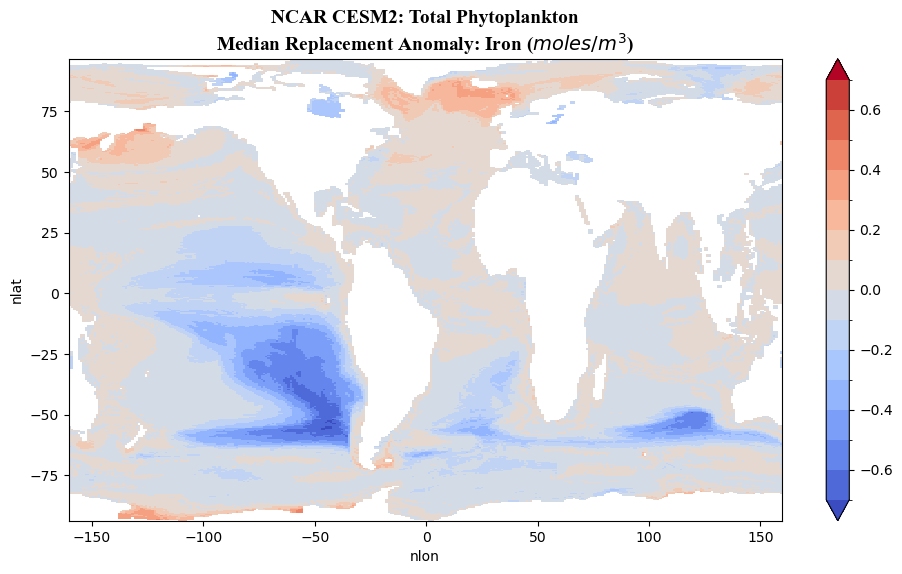

In [89]:
med_sensitivity_plot(dfe5m, psc='logphyc', levels=np.linspace(-0.7,0.7,15), vmin=-0.7, vmax=0.7,
                     title ="NCAR CESM2: Total Phytoplankton\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
                     plot_name="ncarcesm2_medianplot_phyc_dfe.jpg")

##### Microplankton

In [130]:
dif = (dfe5m['logmcro_pred'] - dfe5m['logmcro_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.3686415661451945 0.495892506691311


In [131]:
np.linspace(-0.4,0.5,10)

array([-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])

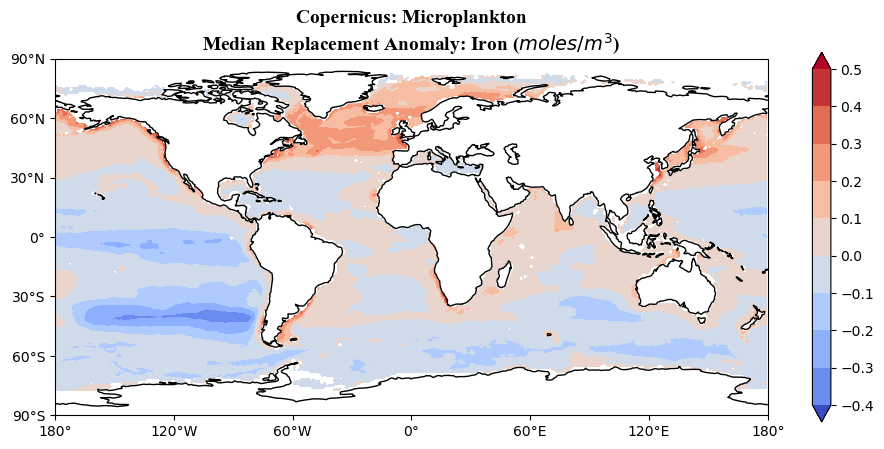

In [132]:
med_sensitivity_plot(dfe5m, psc='logmcro', levels=np.linspace(-0.4,0.5,10), vmin=-0.4, vmax=0.5,
                     title ="Copernicus: Microplankton\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
                     plot_name="sentinel_medianplot_mcro_dfe.jpg")

In [133]:
dif = (dfe5m['lognano_pred'] - dfe5m['lognano_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.5063701658997368 0.4332666098124091


In [134]:
np.linspace(-0.6,0.5,12)

array([-6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01,  1.11022302e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01])

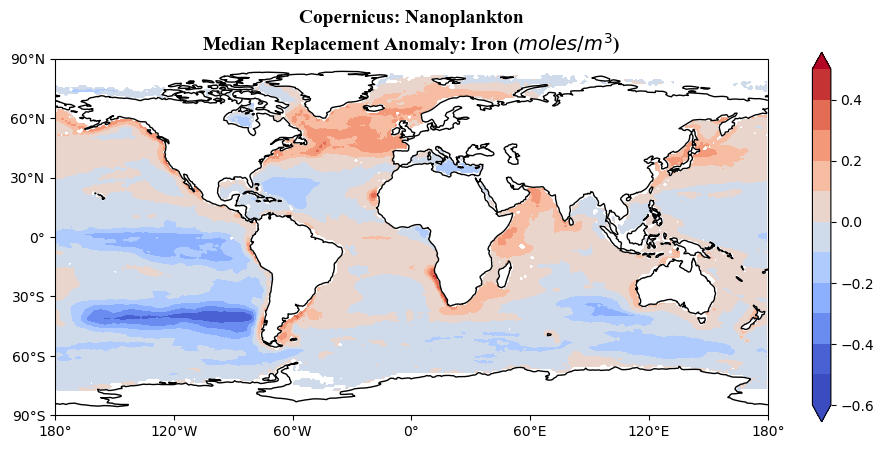

In [135]:
med_sensitivity_plot(dfe5m, psc='lognano', levels=np.linspace(-0.6,0.5,12), vmin=-0.6, vmax=0.5,
                     title ="Copernicus: Nanoplankton\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
                     plot_name="sentinel_medianplot_nano_dfe.jpg")

In [81]:
dif = (dfe5m['logpico_pred'] - dfe5m['logpico_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.49473887696653573 1.1039266849696818


In [136]:
np.linspace(-0.3,0.4,8)

array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4])

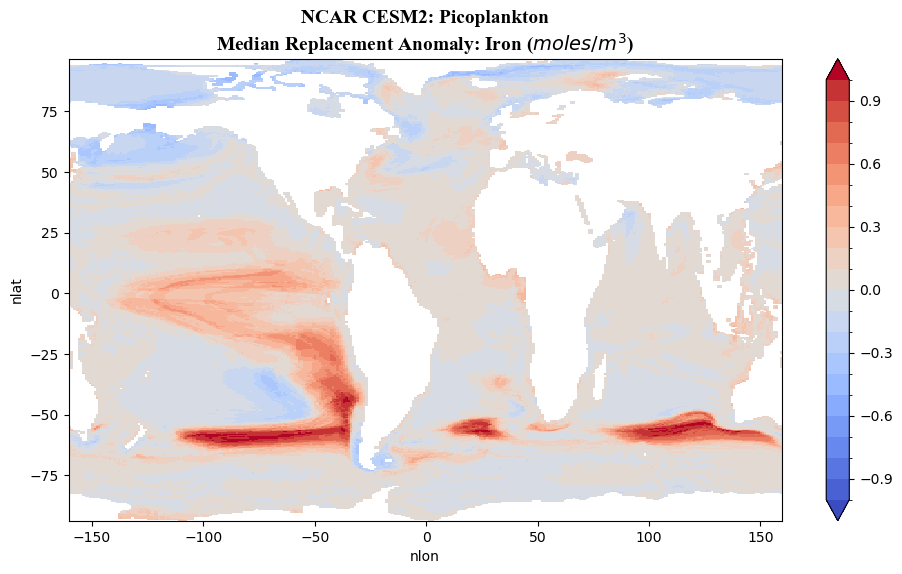

In [90]:
med_sensitivity_plot(dfe5m, psc='logpico', levels=np.linspace(-1.0,1.0,21), vmin=-1.0, vmax=1.0,
                     title ="NCAR CESM2: Picoplankton\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
                     plot_name="ncarcesm2_medianplot_pico_dfe.jpg")

#### Sensitivity $NO_3$

In [91]:
no35m = median_dataset(Xs, df, 'no3')

        dfe       mld       nh4       no3       po4       rsn       sil  \
0  0.127255  1.214077  1.834973  0.999097  0.979619  7.237764  0.086009   
1  0.017475  1.085554  5.939110  0.999097  3.020254  9.707664  0.123576   
2  0.006574  1.210948  3.463432  0.999097  1.734869  6.837828  0.422322   
3  0.016258  1.052613  1.506220  0.999097  0.841788  6.931327  0.149155   
4  0.428215  0.833479  0.797854  0.999097  0.545981  8.790724  0.620369   

        sal       sst       w50  
0  8.093882  7.046799  6.031416  
1  8.085529  8.817873  5.991359  
2  8.065038  6.144602  6.010868  
3  8.082940  6.656231  6.018233  
4  8.355513  9.054205  6.083621  


##### Phytoplankton

In [92]:
dif = (no35m['logphyc_pred'] - no35m['logphyc_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.4318708620041578 0.37183494939022577


In [79]:
np.linspace(-0.8,0.8,14)

array([-0.8       , -0.67692308, -0.55384615, -0.43076923, -0.30769231,
       -0.18461538, -0.06153846,  0.06153846,  0.18461538,  0.30769231,
        0.43076923,  0.55384615,  0.67692308,  0.8       ])

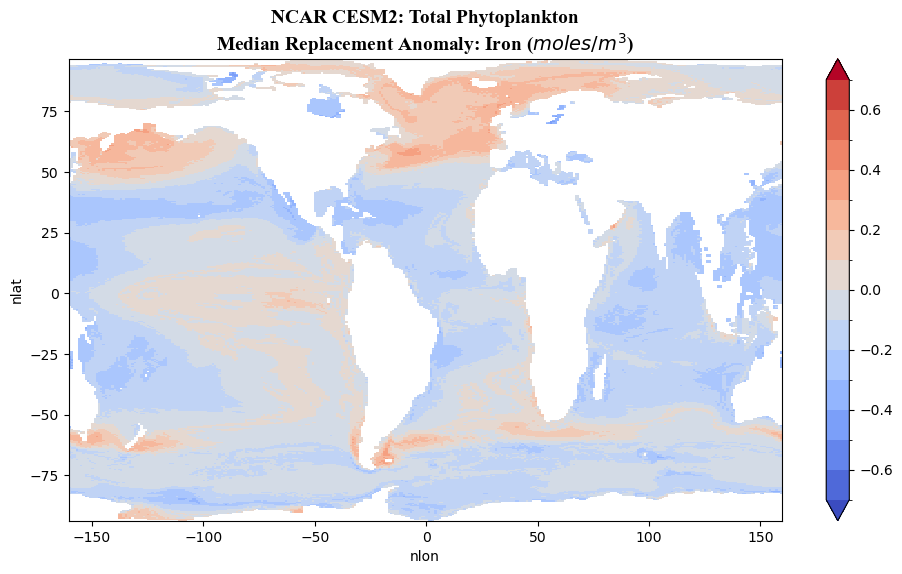

In [93]:
med_sensitivity_plot(no35m, psc='logphyc', levels=np.linspace(-0.7,0.7,15), vmin=-0.7, vmax=0.7,
                     title ="NCAR CESM2: Total Phytoplankton\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
                     plot_name="ncarcesm2_medianplot_phyc_no3.jpg")

##### Microplankton

In [130]:
dif = (dfe5m['logmcro_pred'] - dfe5m['logmcro_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.3686415661451945 0.495892506691311


In [131]:
np.linspace(-0.4,0.5,10)

array([-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])

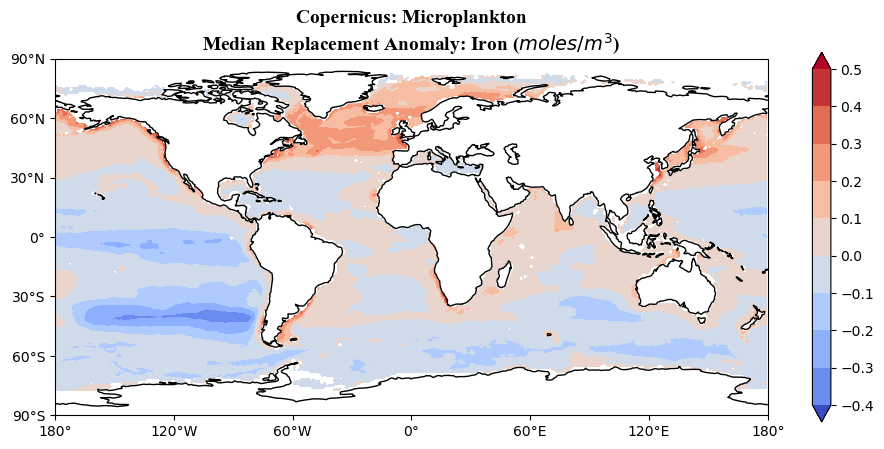

In [132]:
med_sensitivity_plot(dfe5m, psc='logmcro', levels=np.linspace(-0.4,0.5,10), vmin=-0.4, vmax=0.5,
                     title ="Copernicus: Microplankton\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
                     plot_name="sentinel_medianplot_mcro_dfe.jpg")

In [133]:
dif = (dfe5m['lognano_pred'] - dfe5m['lognano_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.5063701658997368 0.4332666098124091


In [134]:
np.linspace(-0.6,0.5,12)

array([-6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01,  1.11022302e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01])

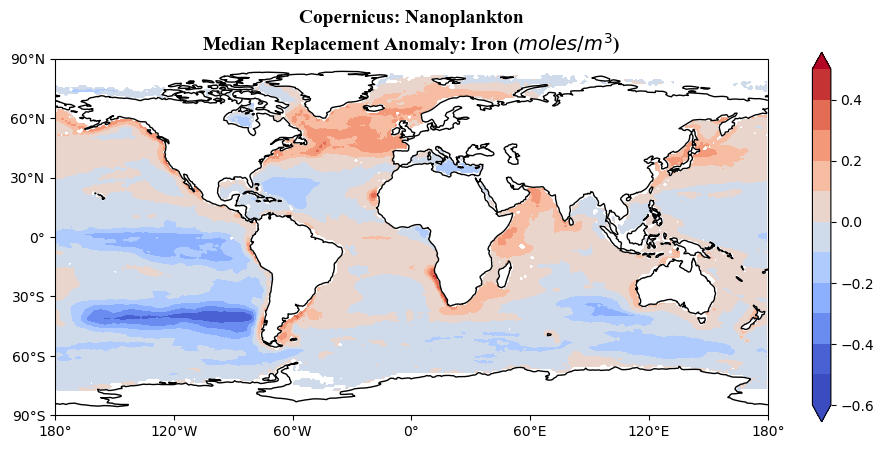

In [135]:
med_sensitivity_plot(dfe5m, psc='lognano', levels=np.linspace(-0.6,0.5,12), vmin=-0.6, vmax=0.5,
                     title ="Copernicus: Nanoplankton\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
                     plot_name="sentinel_medianplot_nano_dfe.jpg")

In [81]:
dif = (dfe5m['logpico_pred'] - dfe5m['logpico_med']).to_numpy()
dif = dif[~np.isnan(dif)]
print(dif.min(),dif.max())

-0.49473887696653573 1.1039266849696818


In [136]:
np.linspace(-0.3,0.4,8)

array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4])

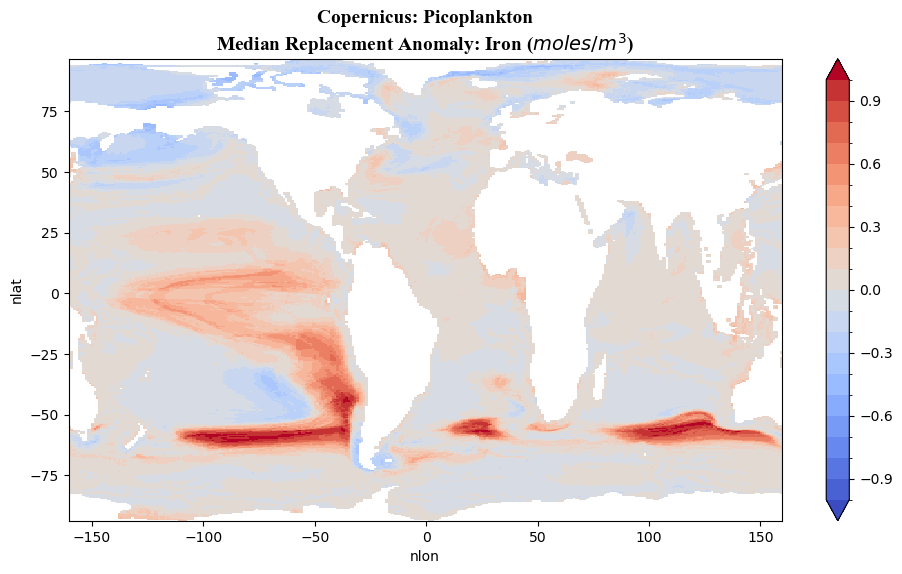

In [83]:
med_sensitivity_plot(dfe5m, psc='logpico', levels=np.linspace(-1.0,1.0,21), vmin=-1.0, vmax=1.0,
                     title ="Copernicus: Picoplankton\nMedian Replacement Anomaly: Iron ($moles/m^3$)",
                     plot_name="ncarcesm2_medianplot_pico_dfe.jpg")

### Sensitivity Analysis

#### Sensitivity Analysis rsntds

In [70]:
Xrsn50 = Xs.copy(deep=True)
for col in Xs.columns:
    if col != 'rsntds':
        Xrsn50[col] = Xrsn50[col].quantile(q=0.5, interpolation='linear')
    else:
        Xrsn50[col] = Xrsn50[col]

In [71]:
Xrsn50.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo
0,10.579873,12.330354,20.620978,19.492224,25.466465,59.653568,16.324768,80.565292,72.530022,52.998095
1,10.579873,12.330354,20.620978,19.492224,25.466465,64.758835,16.324768,80.565292,72.530022,52.998095
2,10.579873,12.330354,20.620978,19.492224,25.466465,29.876022,16.324768,80.565292,72.530022,52.998095
3,10.579873,12.330354,20.620978,19.492224,25.466465,60.719555,16.324768,80.565292,72.530022,52.998095
4,10.579873,12.330354,20.620978,19.492224,25.466465,11.096948,16.324768,80.565292,72.530022,52.998095
5,10.579873,12.330354,20.620978,19.492224,25.466465,30.396202,16.324768,80.565292,72.530022,52.998095
6,10.579873,12.330354,20.620978,19.492224,25.466465,63.784565,16.324768,80.565292,72.530022,52.998095
7,10.579873,12.330354,20.620978,19.492224,25.466465,14.657883,16.324768,80.565292,72.530022,52.998095
8,10.579873,12.330354,20.620978,19.492224,25.466465,14.739287,16.324768,80.565292,72.530022,52.998095
9,10.579873,12.330354,20.620978,19.492224,25.466465,55.710293,16.324768,80.565292,72.530022,52.998095


In [72]:
ydiatos_pred = model_diatos.predict(Xrsn50)
rmse = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
r2 = r2_score(ydiatos, ydiatos_pred)
print(rmse/ ydiatos.std())
print('RMSE phydiatos: ', rmse)
print('R2 Score phydiatos: ', r2)

0.9954995280211568
RMSE phydiatos:  0.652539017499449
R2 Score phydiatos:  0.008979634036228146


In [73]:
ydiazos_pred = model_diazos.predict(Xrsn50)
rmse = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
r2 = r2_score(ydiazos, ydiazos_pred)
print(rmse/ ydiazos.std())
print('RMSE phydiazos: ', rmse)
print('R2 Score phydiazos: ', r2)

1.0598550341853838
RMSE phydiazos:  0.6753076603841522
R2 Score phydiazos:  -0.12329388411164488


In [74]:
ypicoos_pred = model_picoos.predict(Xrsn50)
rmse = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
r2 = r2_score(ypicoos, ypicoos_pred)
print(rmse/ ypicoos.std())
print('RMSE phypicoos: ', rmse)
print('R2 Score phypicoos: ', r2)

0.7393466407445787
RMSE phypicoos:  0.46486964018303933
R2 Score phypicoos:  0.45336596776368965


In [75]:
rsn50 = X.copy(deep=True)
rsn50["logdiatos_pred"] = ydiatos_pred
rsn50["logdiazos_pred"] = ydiazos_pred
rsn50["logpicoos_pred"] = ypicoos_pred

In [76]:
rsn50.head()

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo,logdiatos_pred,logdiazos_pred,logpicoos_pred
740554,3.180139e-07,25.223326,0.000018,0.000032,0.000088,197.573303,0.001305,36.295132,24.330584,-4.145538e-07,-3.827798,-4.458236,-3.263273
317827,3.981322e-07,29.467764,0.000210,0.001872,0.000278,217.887344,0.002850,34.100361,17.554832,-1.282409e-06,-3.831925,-4.462034,-3.272856
331837,1.264013e-06,33.361736,0.000081,0.007342,0.000962,79.087395,0.008464,33.437080,-1.540996,5.137828e-07,-3.860248,-4.445609,-3.639239
121145,6.636462e-07,25.888849,0.000020,0.000024,0.000158,201.814896,0.001871,33.683678,30.472790,-5.474034e-07,-3.827798,-4.457701,-3.272171
751813,1.238260e-06,20.298210,0.000159,0.004236,0.001030,4.364792,0.009508,31.755251,-1.758195,2.150220e-07,-3.964049,-4.545005,-4.098967


In [77]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=rsn50.reset_index(drop=True),x="rsntds",y="logdiatos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiatos",color='orange')
# # sns.lineplot(data=rsn50.reset_index(drop=True),x="rsntds",y="logdiazos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiazos")
# sns.lineplot(data=rsn50.reset_index(drop=True),x="rsntds",y="logpicoos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phypicoos",color='red')
# ax.set_ylabel("log Prediction")
# ax.set_xlabel(r"sw radiation ($W/m^2$)")
# ax.set_title("NCAR CESM2\nSensitivity: Shortwave Radiation")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# fig.savefig(filepath + "cesm2_rsn.jpg",bbox_inches='tight')

#### Sensitivity Analysis dfeos

In [78]:
Xdfe50 = Xs.copy(deep=True)
for col in Xs.columns:
    if col != 'dfeos':
        Xdfe50[col] = Xdfe50[col].quantile(q=0.5, interpolation='linear')
    else:
        Xdfe50[col] = Xdfe50[col]

In [79]:
Xdfe50.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo
0,10.780781,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
1,10.989125,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
2,13.240808,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
3,11.679582,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
4,13.173839,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
5,10.329396,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
6,10.476445,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
7,13.479664,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
8,13.556068,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
9,10.349214,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095


In [80]:
ydiatos_pred = model_diatos.predict(Xdfe50)
rmse = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
r2 = r2_score(ydiatos, ydiatos_pred)
print(rmse/ ydiatos.std())
print('RMSE phydiatos: ', rmse)
print('R2 Score phydiatos: ', r2)

0.983507128612064
RMSE phydiatos:  0.6446781312733894
R2 Score phydiatos:  0.03271269757720907


In [81]:
ydiazos_pred = model_diazos.predict(Xdfe50)
rmse = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
r2 = r2_score(ydiazos, ydiazos_pred)
print(rmse/ ydiazos.std())
print('RMSE phydiazos: ', rmse)
print('R2 Score phydiazos: ', r2)

1.0734626515470054
RMSE phydiazos:  0.6839780237333649
R2 Score phydiazos:  -0.15232328565928066


In [82]:
ypicoos_pred = model_picoos.predict(Xdfe50)
rmse = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
r2 = r2_score(ypicoos, ypicoos_pred)
print(rmse/ ypicoos.std())
print('RMSE phypicoos: ', rmse)
print('R2 Score phypicoos: ', r2)

1.168368946248717
RMSE phypicoos:  0.7346205713421449
R2 Score phypicoos:  -0.36508743561738677


In [83]:
dfe50 = X.copy(deep=True)
dfe50["logdiatos_pred"] = ydiatos_pred
dfe50["logdiazos_pred"] = ydiazos_pred
dfe50["logpicoos_pred"] = ypicoos_pred
dfe50['logdfeos'] = np.log10(dfe50['dfeos'])

In [84]:
dfe50.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo,logdiatos_pred,logdiazos_pred,logpicoos_pred,logdfeos
740554,3.180139e-07,25.223326,0.000018,0.000032,0.000088,197.573303,0.001305,36.295132,24.330584,-4.145538e-07,-3.824435,-4.452413,-3.250348,-6.497554
317827,3.981322e-07,29.467764,0.000210,0.001872,0.000278,217.887344,0.002850,34.100361,17.554832,-1.282409e-06,-3.840576,-4.441203,-3.235336,-6.399972
331837,1.264013e-06,33.361736,0.000081,0.007342,0.000962,79.087395,0.008464,33.437080,-1.540996,5.137828e-07,-3.831795,-4.433458,-3.174148,-5.898249
121145,6.636462e-07,25.888849,0.000020,0.000024,0.000158,201.814896,0.001871,33.683678,30.472790,-5.474034e-07,-3.805456,-4.437683,-3.199691,-6.178063
751813,1.238260e-06,20.298210,0.000159,0.004236,0.001030,4.364792,0.009508,31.755251,-1.758195,2.150220e-07,-3.830034,-4.433458,-3.174148,-5.907188
86067,1.444349e-07,17.757191,0.000503,0.019485,0.001478,81.157204,0.044248,32.837101,-0.979009,5.255791e-07,-3.922308,-4.454616,-3.213096,-6.840328
658254,2.009821e-07,19.475502,0.000022,0.000056,0.000110,214.010681,0.001030,36.129147,21.666149,-7.508089e-07,-3.877339,-4.451794,-3.192051,-6.696843
666705,1.355864e-06,10.317170,0.000127,0.004837,0.001123,18.533880,0.010341,31.512245,-1.660611,1.635113e-07,-3.831795,-4.432061,-3.174148,-5.867784
500833,1.385246e-06,20.365849,0.000010,0.005766,0.000968,18.857792,0.009154,32.843948,-1.771093,-4.538255e-08,-3.823146,-4.432061,-3.174148,-5.858473
14231,1.520556e-07,67.102966,0.000520,0.013359,0.001084,181.882858,0.018806,33.891808,7.964497,1.848182e-07,-3.883491,-4.455751,-3.193335,-6.817997


In [85]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=dfe50.reset_index(drop=True),x="logdfeos",y="logdiatos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiatos",color='orange')
# # sns.lineplot(data=dfe50.reset_index(drop=True),x="logdfeos",y="logdiazos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiazos")
# sns.lineplot(data=dfe50.reset_index(drop=True),x="logdfeos",y="logpicoos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phypicoos",color='red')
# ax.set_ylabel("log Prediction")
# ax.set_xlabel(r"log iron ($moles/m^3$)")
# ax.set_title("NCAR CESM2\nSensitivity: Iron")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# fig.savefig(filepath + "cesm2_dfeos.jpg",bbox_inches='tight')

#### Sensitivity Analysis tos

In [86]:
Xtos50 = Xs.copy(deep=True)
for col in Xs.columns:
    if col != 'tos':
        Xtos50[col] = Xtos50[col].quantile(q=0.5, interpolation='linear')
    else:
        Xtos50[col] = Xtos50[col]

In [87]:
Xtos50.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo
0,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,79.989304,52.998095
1,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,61.943214,52.998095
2,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,11.084632,52.998095
3,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,96.348053,52.998095
4,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,10.506159,52.998095
5,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,12.581391,52.998095
6,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.893021,52.998095
7,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,10.766058,52.998095
8,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,10.471806,52.998095
9,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,36.400940,52.998095


In [88]:
ydiatos_pred = model_diatos.predict(Xtos50)
rmse = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
r2 = r2_score(ydiatos, ydiatos_pred)
print(rmse/ ydiatos.std())
print('RMSE phydiatos: ', rmse)
print('R2 Score phydiatos: ', r2)

1.0866785783209603
RMSE phydiatos:  0.7123058845088546
R2 Score phydiatos:  -0.18087159049199486


In [89]:
ydiazos_pred = model_diazos.predict(Xtos50)
rmse = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
r2 = r2_score(ydiazos, ydiazos_pred)
print(rmse/ ydiazos.std())
print('RMSE phydiazos: ', rmse)
print('R2 Score phydiazos: ', r2)

0.6226595583242196
RMSE phydiazos:  0.3967398898764953
R2 Score phydiazos:  0.6122946634832921


In [90]:
ypicoos_pred = model_picoos.predict(Xtos50)
rmse = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
r2 = r2_score(ypicoos, ypicoos_pred)
print(rmse/ ypicoos.std())
print('RMSE phypicoos: ', rmse)
print('R2 Score phypicoos: ', r2)

1.0259417240183837
RMSE phypicoos:  0.6450684074426698
R2 Score phypicoos:  -0.05255753221764037


In [91]:
tos50 = X.copy(deep=True)
tos50["logdiatos_pred"] = ydiatos_pred
tos50["logdiazos_pred"] = ydiazos_pred
tos50["logpicoos_pred"] = ypicoos_pred

In [92]:
tos50.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo,logdiatos_pred,logdiazos_pred,logpicoos_pred
740554,3.180139e-07,25.223326,0.000018,0.000032,0.000088,197.573303,0.001305,36.295132,24.330584,-4.145538e-07,-3.771504,-4.441349,-3.357638
317827,3.981322e-07,29.467764,0.000210,0.001872,0.000278,217.887344,0.002850,34.100361,17.554832,-1.282409e-06,-3.779798,-4.464556,-3.180881
331837,1.264013e-06,33.361736,0.000081,0.007342,0.000962,79.087395,0.008464,33.437080,-1.540996,5.137828e-07,-3.243260,-5.029446,-3.367607
121145,6.636462e-07,25.888849,0.000020,0.000024,0.000158,201.814896,0.001871,33.683678,30.472790,-5.474034e-07,-3.909576,-4.425534,-3.189204
751813,1.238260e-06,20.298210,0.000159,0.004236,0.001030,4.364792,0.009508,31.755251,-1.758195,2.150220e-07,-3.295906,-5.029446,-3.483524
86067,1.444349e-07,17.757191,0.000503,0.019485,0.001478,81.157204,0.044248,32.837101,-0.979009,5.255791e-07,-3.270964,-5.029446,-3.368711
658254,2.009821e-07,19.475502,0.000022,0.000056,0.000110,214.010681,0.001030,36.129147,21.666149,-7.508089e-07,-3.871971,-4.451011,-3.265537
666705,1.355864e-06,10.317170,0.000127,0.004837,0.001123,18.533880,0.010341,31.512245,-1.660611,1.635113e-07,-3.279605,-5.029446,-3.367607
500833,1.385246e-06,20.365849,0.000010,0.005766,0.000968,18.857792,0.009154,32.843948,-1.771093,-4.538255e-08,-3.336778,-5.029446,-3.518572
14231,1.520556e-07,67.102966,0.000520,0.013359,0.001084,181.882858,0.018806,33.891808,7.964497,1.848182e-07,-3.347979,-5.823294,-3.519313


In [93]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=tos50.reset_index(drop=True),x="tos",y="logdiatos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiatos",color='orange')
# # sns.lineplot(data=tos50.reset_index(drop=True),x="tos",y="logdiazos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiazos")
# sns.lineplot(data=tos50.reset_index(drop=True),x="tos",y="logpicoos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phypicoos",color='red')
# ax.set_ylabel("log Prediction")
# ax.set_xlabel(r"SST ($^\circ C$)")
# ax.set_title("NCAR CESM2\nSensitivity: SST")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# fig.savefig(filepath + "cesm2_tos.jpg",bbox_inches='tight')

#### Sensitivity Analysis no3os

In [94]:
Xno350 = Xs.copy(deep=True)
for col in Xs.columns:
    if col != 'no3os':
        Xno350[col] = Xno350[col].quantile(q=0.5, interpolation='linear')
    else:
        Xno350[col] = Xno350[col]

In [95]:
Xno350.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo
0,10.579873,12.330354,20.620978,12.865553,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
1,10.579873,12.330354,20.620978,19.608353,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
2,10.579873,12.330354,20.620978,39.665176,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
3,10.579873,12.330354,20.620978,12.834939,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
4,10.579873,12.330354,20.620978,28.275459,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
5,10.579873,12.330354,20.620978,84.181633,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
6,10.579873,12.330354,20.620978,12.950729,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
7,10.579873,12.330354,20.620978,30.479897,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
8,10.579873,12.330354,20.620978,33.884777,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
9,10.579873,12.330354,20.620978,61.723495,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095


In [96]:
ydiatos_pred = model_diatos.predict(Xno350)
rmse = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
r2 = r2_score(ydiatos, ydiatos_pred)
print(rmse/ ydiatos.std())
print('RMSE phydiatos: ', rmse)
print('R2 Score phydiatos: ', r2)

1.0209336865131438
RMSE phydiatos:  0.6692108293146463
R2 Score phydiatos:  -0.042306702562943777


In [97]:
ydiazos_pred = model_diazos.predict(Xno350)
rmse = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
r2 = r2_score(ydiazos, ydiazos_pred)
print(rmse/ ydiazos.std())
print('RMSE phydiazos: ', rmse)
print('R2 Score phydiazos: ', r2)

1.0218614395137036
RMSE phydiazos:  0.6510992878239966
R2 Score phydiazos:  -0.044201908355854025


In [98]:
ypicoos_pred = model_picoos.predict(Xno350)
rmse = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
r2 = r2_score(ypicoos, ypicoos_pred)
print(rmse/ ypicoos.std())
print('RMSE phypicoos: ', rmse)
print('R2 Score phypicoos: ', r2)

1.0566238947124145
RMSE phypicoos:  0.6643600480135994
R2 Score phypicoos:  -0.11645523346687714


In [99]:
no350 = X.copy(deep=True)
no350["logdiatos_pred"] = ydiatos_pred
no350["logdiazos_pred"] = ydiazos_pred
no350["logpicoos_pred"] = ypicoos_pred
# no350["nh4os_scaled"] = no350["no3os"] * 1e3

In [100]:
no350.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo,logdiatos_pred,logdiazos_pred,logpicoos_pred
740554,3.180139e-07,25.223326,0.000018,0.000032,0.000088,197.573303,0.001305,36.295132,24.330584,-4.145538e-07,-4.032908,-4.382710,-3.281981
317827,3.981322e-07,29.467764,0.000210,0.001872,0.000278,217.887344,0.002850,34.100361,17.554832,-1.282409e-06,-3.871971,-4.453240,-3.253268
331837,1.264013e-06,33.361736,0.000081,0.007342,0.000962,79.087395,0.008464,33.437080,-1.540996,5.137828e-07,-3.703650,-4.564588,-3.470093
121145,6.636462e-07,25.888849,0.000020,0.000024,0.000158,201.814896,0.001871,33.683678,30.472790,-5.474034e-07,-4.027472,-4.376240,-3.294908
751813,1.238260e-06,20.298210,0.000159,0.004236,0.001030,4.364792,0.009508,31.755251,-1.758195,2.150220e-07,-3.756588,-4.465446,-3.335162
86067,1.444349e-07,17.757191,0.000503,0.019485,0.001478,81.157204,0.044248,32.837101,-0.979009,5.255791e-07,-3.508255,-4.575117,-3.466233
658254,2.009821e-07,19.475502,0.000022,0.000056,0.000110,214.010681,0.001030,36.129147,21.666149,-7.508089e-07,-3.984541,-4.390985,-3.225384
666705,1.355864e-06,10.317170,0.000127,0.004837,0.001123,18.533880,0.010341,31.512245,-1.660611,1.635113e-07,-3.742765,-4.469621,-3.352746
500833,1.385246e-06,20.365849,0.000010,0.005766,0.000968,18.857792,0.009154,32.843948,-1.771093,-4.538255e-08,-3.743596,-4.559503,-3.466821
14231,1.520556e-07,67.102966,0.000520,0.013359,0.001084,181.882858,0.018806,33.891808,7.964497,1.848182e-07,-3.556021,-4.538557,-3.468627


In [101]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=no350.reset_index(drop=True),x="no3os",y="logdiatos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiatos",color='orange')
# # sns.lineplot(data=no350.reset_index(drop=True),x=no3os",y="logdiazos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiazos")
# sns.lineplot(data=no350.reset_index(drop=True),x="no3os",y="logpicoos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phypicoos",color='red')
# ax.set_ylabel("log Prediction")
# ax.set_xlabel(r"$NO_3 (milimoles/m^3)$")
# ax.set_title("NCAR CESM2\nSensitivity: Nitrate")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# fig.savefig(filepath + "cesm2_no3os.jpg",bbox_inches='tight')

#### Sensitivity Analysis nh4os

In [102]:
Xnh450 = Xs.copy(deep=True)
for col in Xs.columns:
    if col != 'nh4os':
        Xnh450[col] = Xnh450[col].quantile(q=0.5, interpolation='linear')
    else:
        Xnh450[col] = Xnh450[col]

In [103]:
Xnh450.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo
0,10.579873,12.330354,15.180872,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
1,10.579873,12.330354,29.092129,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
2,10.579873,12.330354,19.771574,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
3,10.579873,12.330354,15.338280,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
4,10.579873,12.330354,25.414330,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
5,10.579873,12.330354,50.208656,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
6,10.579873,12.330354,15.480579,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
7,10.579873,12.330354,23.068169,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
8,10.579873,12.330354,14.658167,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
9,10.579873,12.330354,51.455715,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095


In [104]:
ydiatos_pred = model_diatos.predict(Xnh450)
rmse = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
r2 = r2_score(ydiatos, ydiatos_pred)
print(rmse/ ydiatos.std())
print('RMSE phydiatos: ', rmse)
print('R2 Score phydiatos: ', r2)

0.9782156302498729
RMSE phydiatos:  0.641209612157938
R2 Score phydiatos:  0.04309316140047392


In [105]:
ydiazos_pred = model_diazos.predict(Xnh450)
rmse = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
r2 = r2_score(ydiazos, ydiazos_pred)
print(rmse/ ydiazos.std())
print('RMSE phydiazos: ', rmse)
print('R2 Score phydiazos: ', r2)

1.0688343015276855
RMSE phydiazos:  0.6810289787015713
R2 Score phydiazos:  -0.14240797500549918


In [106]:
ypicoos_pred = model_picoos.predict(Xnh450)
rmse = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
r2 = r2_score(ypicoos, ypicoos_pred)
print(rmse/ ypicoos.std())
print('RMSE phypicoos: ', rmse)
print('R2 Score phypicoos: ', r2)

1.1602115071352017
RMSE phypicoos:  0.7294915214803697
R2 Score phypicoos:  -0.3460921622955624


In [107]:
nh450 = X.copy(deep=True)
nh450["logdiatos_pred"] = ydiatos_pred
nh450["logdiazos_pred"] = ydiazos_pred
nh450["logpicoos_pred"] = ypicoos_pred
nh450["nh4os_scaled"] = nh450["nh4os"] * 1e3

In [108]:
nh450.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo,logdiatos_pred,logdiazos_pred,logpicoos_pred,nh4os_scaled
740554,3.180139e-07,25.223326,0.000018,0.000032,0.000088,197.573303,0.001305,36.295132,24.330584,-4.145538e-07,-4.096594,-4.395364,-3.353586,0.017720
317827,3.981322e-07,29.467764,0.000210,0.001872,0.000278,217.887344,0.002850,34.100361,17.554832,-1.282409e-06,-3.360665,-4.454417,-3.412399,0.210392
331837,1.264013e-06,33.361736,0.000081,0.007342,0.000962,79.087395,0.008464,33.437080,-1.540996,5.137828e-07,-3.895109,-4.451922,-3.281070,0.081302
121145,6.636462e-07,25.888849,0.000020,0.000024,0.000158,201.814896,0.001871,33.683678,30.472790,-5.474034e-07,-4.098216,-4.405025,-3.334522,0.019900
751813,1.238260e-06,20.298210,0.000159,0.004236,0.001030,4.364792,0.009508,31.755251,-1.758195,2.150220e-07,-3.490565,-4.451286,-3.266028,0.159454
86067,1.444349e-07,17.757191,0.000503,0.019485,0.001478,81.157204,0.044248,32.837101,-0.979009,5.255791e-07,-2.941620,-4.488791,-4.072241,0.502859
658254,2.009821e-07,19.475502,0.000022,0.000056,0.000110,214.010681,0.001030,36.129147,21.666149,-7.508089e-07,-4.059282,-4.406799,-3.349005,0.021871
666705,1.355864e-06,10.317170,0.000127,0.004837,0.001123,18.533880,0.010341,31.512245,-1.660611,1.635113e-07,-3.681482,-4.450520,-3.264169,0.126960
500833,1.385246e-06,20.365849,0.000010,0.005766,0.000968,18.857792,0.009154,32.843948,-1.771093,-4.538255e-08,-4.102799,-4.408824,-3.367750,0.010480
14231,1.520556e-07,67.102966,0.000520,0.013359,0.001084,181.882858,0.018806,33.891808,7.964497,1.848182e-07,-2.938236,-4.488791,-4.072241,0.520131


In [109]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=nh450.reset_index(drop=True),x="nh4os_scaled",y="logdiatos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiatos",color='orange')
# # sns.lineplot(data=nh450.reset_index(drop=True),x="nh4os_scaled",y="logdiazos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiazos")
# sns.lineplot(data=nh450.reset_index(drop=True),x="nh4os_scaled",y="logpicoos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phypicoos",color='red')
# ax.set_ylabel("log Prediction")
# ax.set_xlabel(r"$NH_4 (milimoles/m^3)$")
# ax.set_title("NCAR CESM2\nSensitivity: Ammonia")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# fig.savefig(filepath + "cesm2_nh4os.jpg",bbox_inches='tight')

#### Sensitivity Analysis mlotst

In [110]:
Xmld50 = Xs.copy(deep=True)
for col in Xs.columns:
    if col != 'mlotst':
        Xmld50[col] = Xmld50[col].quantile(q=0.5, interpolation='linear')
    else:
        Xmld50[col] = Xmld50[col]

In [111]:
Xmld50.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo
0,10.579873,11.293080,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
1,10.579873,11.510672,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
2,10.579873,11.710298,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
3,10.579873,11.327198,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
4,10.579873,11.040592,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
5,10.579873,10.910327,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
6,10.579873,10.998416,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
7,10.579873,10.528913,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
8,10.579873,11.044060,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095
9,10.579873,13.440050,20.620978,19.492224,25.466465,56.771704,16.324768,80.565292,72.530022,52.998095


In [112]:
ydiatos_pred = model_diatos.predict(Xmld50)
rmse = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
r2 = r2_score(ydiatos, ydiatos_pred)
print(rmse/ ydiatos.std())
print('RMSE phydiatos: ', rmse)
print('R2 Score phydiatos: ', r2)

1.1471040378905126
RMSE phydiatos:  0.7519141102383503
R2 Score phydiatos:  -0.3158490754383154


In [113]:
ydiazos_pred = model_diazos.predict(Xmld50)
rmse = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
r2 = r2_score(ydiazos, ydiazos_pred)
print(rmse/ ydiazos.std())
print('RMSE phydiazos: ', rmse)
print('R2 Score phydiazos: ', r2)

1.0665125319518671
RMSE phydiazos:  0.679549617157186
R2 Score phydiazos:  -0.1374501864387505


In [114]:
ypicoos_pred = model_picoos.predict(Xmld50)
rmse = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
r2 = r2_score(ypicoos, ypicoos_pred)
print(rmse/ ypicoos.std())
print('RMSE phypicoos: ', rmse)
print('R2 Score phypicoos: ', r2)

1.0683427178305918
RMSE phypicoos:  0.6717283442715354
R2 Score phypicoos:  -0.14135736761932138


In [115]:
mld50 = X.copy(deep=True)
mld50["logdiatos_pred"] = ydiatos_pred
mld50["logdiazos_pred"] = ydiazos_pred
mld50["logpicoos_pred"] = ypicoos_pred
# mld50["nh4os_scaled"] = mld50["no3os"] * 1e3

In [116]:
mld50.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo,logdiatos_pred,logdiazos_pred,logpicoos_pred
740554,3.180139e-07,25.223326,0.000018,0.000032,0.000088,197.573303,0.001305,36.295132,24.330584,-4.145538e-07,-3.178443,-4.482277,-3.371481
317827,3.981322e-07,29.467764,0.000210,0.001872,0.000278,217.887344,0.002850,34.100361,17.554832,-1.282409e-06,-3.363781,-4.472046,-3.322313
331837,1.264013e-06,33.361736,0.000081,0.007342,0.000962,79.087395,0.008464,33.437080,-1.540996,5.137828e-07,-3.621677,-4.465063,-3.282886
121145,6.636462e-07,25.888849,0.000020,0.000024,0.000158,201.814896,0.001871,33.683678,30.472790,-5.474034e-07,-3.220732,-4.474953,-3.343243
751813,1.238260e-06,20.298210,0.000159,0.004236,0.001030,4.364792,0.009508,31.755251,-1.758195,2.150220e-07,-2.881687,-4.498532,-3.622192
86067,1.444349e-07,17.757191,0.000503,0.019485,0.001478,81.157204,0.044248,32.837101,-0.979009,5.255791e-07,-2.789533,-4.510995,-3.668177
658254,2.009821e-07,19.475502,0.000022,0.000056,0.000110,214.010681,0.001030,36.129147,21.666149,-7.508089e-07,-2.902626,-4.501050,-3.611653
666705,1.355864e-06,10.317170,0.000127,0.004837,0.001123,18.533880,0.010341,31.512245,-1.660611,1.635113e-07,-2.769209,-4.511106,-3.826428
500833,1.385246e-06,20.365849,0.000010,0.005766,0.000968,18.857792,0.009154,32.843948,-1.771093,-4.538255e-08,-2.892949,-4.498532,-3.622192
14231,1.520556e-07,67.102966,0.000520,0.013359,0.001084,181.882858,0.018806,33.891808,7.964497,1.848182e-07,-3.936517,-4.451880,-3.262701


In [117]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=mld50.reset_index(drop=True),x="mlotst",y="logdiatos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiatos",color='orange')
# # sns.lineplot(data=mld50.reset_index(drop=True),x=mlotst",y="logdiazos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiazos")
# sns.lineplot(data=mld50.reset_index(drop=True),x="mlotst",y="logpicoos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phypicoos",color='red')
# ax.set_ylabel("log Prediction")
# ax.set_xlabel("MLD (m)")
# ax.set_title("NCAR CESM2\nSensitivity: MLD")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# fig.savefig(filepath + "cesm2_mlotst.jpg",bbox_inches='tight')

#### Sensitivity Analysis po4os

In [118]:
Xpo450 = Xs.copy(deep=True)
for col in Xs.columns:
    if col != 'po4os':
        Xpo450[col] = Xpo450[col].quantile(q=0.5, interpolation='linear')
    else:
        Xpo450[col] = Xpo450[col]

In [119]:
Xpo450.head(20)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo
0,10.579873,12.330354,20.620978,19.492224,13.549213,56.771704,16.324768,80.565292,72.530022,52.998095
1,10.579873,12.330354,20.620978,19.492224,21.503300,56.771704,16.324768,80.565292,72.530022,52.998095
2,10.579873,12.330354,20.620978,19.492224,50.135689,56.771704,16.324768,80.565292,72.530022,52.998095
3,10.579873,12.330354,20.620978,19.492224,16.485836,56.771704,16.324768,80.565292,72.530022,52.998095
4,10.579873,12.330354,20.620978,19.492224,52.981384,56.771704,16.324768,80.565292,72.530022,52.998095
5,10.579873,12.330354,20.620978,19.492224,71.751686,56.771704,16.324768,80.565292,72.530022,52.998095
6,10.579873,12.330354,20.620978,19.492224,14.495619,56.771704,16.324768,80.565292,72.530022,52.998095
7,10.579873,12.330354,20.620978,19.492224,56.894127,56.771704,16.324768,80.565292,72.530022,52.998095
8,10.579873,12.330354,20.620978,19.492224,50.380806,56.771704,16.324768,80.565292,72.530022,52.998095
9,10.579873,12.330354,20.620978,19.492224,55.231659,56.771704,16.324768,80.565292,72.530022,52.998095


In [120]:
ydiatos_pred = model_diatos.predict(Xpo450)
rmse = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
r2 = r2_score(ydiatos, ydiatos_pred)
print(rmse/ ydiatos.std())
print('RMSE phydiatos: ', rmse)
print('R2 Score phydiatos: ', r2)

1.05570017714906
RMSE phydiatos:  0.6919998824511762
R2 Score phydiatos:  -0.11450405124560525


In [121]:
ydiazos_pred = model_diazos.predict(Xpo450)
rmse = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
r2 = r2_score(ydiazos, ydiazos_pred)
print(rmse/ ydiazos.std())
print('RMSE phydiazos: ', rmse)
print('R2 Score phydiazos: ', r2)

1.0576517777864043
RMSE phydiazos:  0.6739038118614484
R2 Score phydiazos:  -0.11862846873322708


In [122]:
ypicoos_pred = model_picoos.predict(Xpo450)
rmse = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
r2 = r2_score(ypicoos, ypicoos_pred)
print(rmse/ ypicoos.std())
print('RMSE phypicoos: ', rmse)
print('R2 Score phypicoos: ', r2)

0.9508601352137539
RMSE phypicoos:  0.5978603060616599
R2 Score phypicoos:  0.09586404880718591


In [123]:
po450 = X.copy(deep=True)
po450["logdiatos_pred"] = ydiatos_pred
po450["logdiazos_pred"] = ydiazos_pred
po450["logpicoos_pred"] = ypicoos_pred
# po450["nh4os_scaled"] = po450["po4os"] * 1e3

In [124]:
po450.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo,logdiatos_pred,logdiazos_pred,logpicoos_pred
740554,3.180139e-07,25.223326,0.000018,0.000032,0.000088,197.573303,0.001305,36.295132,24.330584,-4.145538e-07,-4.060646,-4.441634,-3.097833
317827,3.981322e-07,29.467764,0.000210,0.001872,0.000278,217.887344,0.002850,34.100361,17.554832,-1.282409e-06,-3.863020,-4.441737,-3.200315
331837,1.264013e-06,33.361736,0.000081,0.007342,0.000962,79.087395,0.008464,33.437080,-1.540996,5.137828e-07,-3.407580,-4.473523,-3.712211
121145,6.636462e-07,25.888849,0.000020,0.000024,0.000158,201.814896,0.001871,33.683678,30.472790,-5.474034e-07,-4.012383,-4.440619,-3.131369
751813,1.238260e-06,20.298210,0.000159,0.004236,0.001030,4.364792,0.009508,31.755251,-1.758195,2.150220e-07,-3.404557,-4.481847,-3.707089
86067,1.444349e-07,17.757191,0.000503,0.019485,0.001478,81.157204,0.044248,32.837101,-0.979009,5.255791e-07,-3.350203,-4.485166,-3.730367
658254,2.009821e-07,19.475502,0.000022,0.000056,0.000110,214.010681,0.001030,36.129147,21.666149,-7.508089e-07,-4.037633,-4.441634,-3.097833
666705,1.355864e-06,10.317170,0.000127,0.004837,0.001123,18.533880,0.010341,31.512245,-1.660611,1.635113e-07,-3.350203,-4.487547,-3.730473
500833,1.385246e-06,20.365849,0.000010,0.005766,0.000968,18.857792,0.009154,32.843948,-1.771093,-4.538255e-08,-3.407580,-4.473523,-3.712211
14231,1.520556e-07,67.102966,0.000520,0.013359,0.001084,181.882858,0.018806,33.891808,7.964497,1.848182e-07,-3.323211,-4.482378,-3.720747


In [125]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=po450.reset_index(drop=True),x="po4os",y="logdiatos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiatos",color='orange')
# # sns.lineplot(data=po450.reset_index(drop=True),x=po4os",y="logdiazos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiazos")
# sns.lineplot(data=po450.reset_index(drop=True),x="po4os",y="logpicoos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phypicoos",color='red')
# ax.set_ylabel("log Prediction")
# ax.set_xlabel(r"$PO_4 (milimoles/m^3)$")
# ax.set_title("NCAR CESM2\nSensitivity: Phosphate")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# fig.savefig(filepath + "cesm2_po4os.jpg",bbox_inches='tight')

#### Sensitivity Analysis sios

In [126]:
Xsi50 = Xs.copy(deep=True)
for col in Xs.columns:
    if col != 'sios':
        Xsi50[col] = Xsi50[col].quantile(q=0.5, interpolation='linear')
    else:
        Xsi50[col] = Xsi50[col]

In [127]:
Xsi50.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo
0,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,13.044523,80.565292,72.530022,52.998095
1,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,15.472383,80.565292,72.530022,52.998095
2,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,24.290400,80.565292,72.530022,52.998095
3,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,13.933743,80.565292,72.530022,52.998095
4,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,25.931278,80.565292,72.530022,52.998095
5,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,80.504944,80.565292,72.530022,52.998095
6,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,12.613114,80.565292,72.530022,52.998095
7,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,27.239994,80.565292,72.530022,52.998095
8,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,25.375683,80.565292,72.530022,52.998095
9,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,40.537415,80.565292,72.530022,52.998095


In [128]:
ydiatos_pred = model_diatos.predict(Xsi50)
rmse = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
r2 = r2_score(ydiatos, ydiatos_pred)
print(rmse/ ydiatos.std())
print('RMSE phydiatos: ', rmse)
print('R2 Score phydiatos: ', r2)

1.0116080023399183
RMSE phydiatos:  0.6630979456651651
R2 Score phydiatos:  -0.023351840512329636


In [129]:
ydiazos_pred = model_diazos.predict(Xsi50)
rmse = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
r2 = r2_score(ydiazos, ydiazos_pred)
print(rmse/ ydiazos.std())
print('RMSE phydiazos: ', rmse)
print('R2 Score phydiazos: ', r2)

1.0771229316322928
RMSE phydiazos:  0.6863102438021651
R2 Score phydiazos:  -0.16019503958468073


In [130]:
ypicoos_pred = model_picoos.predict(Xsi50)
rmse = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
r2 = r2_score(ypicoos, ypicoos_pred)
print(rmse/ ypicoos.std())
print('RMSE phypicoos: ', rmse)
print('R2 Score phypicoos: ', r2)

1.1226104732557682
RMSE phypicoos:  0.7058495947754085
R2 Score phypicoos:  -0.26025560505652146


In [131]:
si50 = X.copy(deep=True)
si50["logdiatos_pred"] = ydiatos_pred
si50["logdiazos_pred"] = ydiazos_pred
si50["logpicoos_pred"] = ypicoos_pred
# si50["sios_scaled"] = si50["sios"] * 1e3

In [132]:
si50.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo,logdiatos_pred,logdiazos_pred,logpicoos_pred
740554,3.180139e-07,25.223326,0.000018,0.000032,0.000088,197.573303,0.001305,36.295132,24.330584,-4.145538e-07,-3.750683,-4.457631,-3.396880
317827,3.981322e-07,29.467764,0.000210,0.001872,0.000278,217.887344,0.002850,34.100361,17.554832,-1.282409e-06,-3.867231,-4.453241,-3.279675
331837,1.264013e-06,33.361736,0.000081,0.007342,0.000962,79.087395,0.008464,33.437080,-1.540996,5.137828e-07,-3.869626,-4.441589,-3.259354
121145,6.636462e-07,25.888849,0.000020,0.000024,0.000158,201.814896,0.001871,33.683678,30.472790,-5.474034e-07,-3.779544,-4.455155,-3.380079
751813,1.238260e-06,20.298210,0.000159,0.004236,0.001030,4.364792,0.009508,31.755251,-1.758195,2.150220e-07,-3.869626,-4.441589,-3.259354
86067,1.444349e-07,17.757191,0.000503,0.019485,0.001478,81.157204,0.044248,32.837101,-0.979009,5.255791e-07,-3.847870,-4.444227,-3.213929
658254,2.009821e-07,19.475502,0.000022,0.000056,0.000110,214.010681,0.001030,36.129147,21.666149,-7.508089e-07,-3.734858,-4.457315,-3.398290
666705,1.355864e-06,10.317170,0.000127,0.004837,0.001123,18.533880,0.010341,31.512245,-1.660611,1.635113e-07,-3.868618,-4.441691,-3.265356
500833,1.385246e-06,20.365849,0.000010,0.005766,0.000968,18.857792,0.009154,32.843948,-1.771093,-4.538255e-08,-3.869626,-4.441589,-3.259354
14231,1.520556e-07,67.102966,0.000520,0.013359,0.001084,181.882858,0.018806,33.891808,7.964497,1.848182e-07,-3.789919,-4.441919,-3.270091


In [133]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=si50.reset_index(drop=True),x="sios",y="logdiatos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiatos",color='orange')
# # sns.lineplot(data=si50.reset_index(drop=True),x=sios",y="logdiazos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiazos")
# sns.lineplot(data=si50.reset_index(drop=True),x="sios",y="logpicoos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phypicoos",color='red')
# ax.set_ylabel("log Prediction")
# ax.set_xlabel(r"$silicate (milimoles/m^3)$")
# ax.set_title("NCAR CESM2\nSensitivity: Silicate")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# fig.savefig(filepath + "cesm2_sios.jpg",bbox_inches='tight')

#### Sensitivity Analysis sos

In [134]:
Xsos50 = Xs.copy(deep=True)
for col in Xs.columns:
    if col != 'sos':
        Xsos50[col] = Xsos50[col].quantile(q=0.5, interpolation='linear')
    else:
        Xsos50[col] = Xsos50[col]

In [135]:
Xsos50.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo
0,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,86.076828,72.530022,52.998095
1,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,80.394928,72.530022,52.998095
2,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,78.677795,72.530022,52.998095
3,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,79.316208,72.530022,52.998095
4,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,74.323822,72.530022,52.998095
5,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,77.124557,72.530022,52.998095
6,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,85.647125,72.530022,52.998095
7,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,73.694717,72.530022,52.998095
8,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,77.142273,72.530022,52.998095
9,10.579873,12.330354,20.620978,19.492224,25.466465,56.771704,16.324768,79.855011,72.530022,52.998095


In [136]:
ydiatos_pred = model_diatos.predict(Xsos50)
rmse = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
r2 = r2_score(ydiatos, ydiatos_pred)
print(rmse/ ydiatos.std())
print('RMSE phydiatos: ', rmse)
print('R2 Score phydiatos: ', r2)

0.998271336197016
RMSE phydiatos:  0.6543559073450599
R2 Score phydiatos:  0.0034532777671089088


In [137]:
ydiazos_pred = model_diazos.predict(Xsos50)
rmse = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
r2 = r2_score(ydiazos, ydiazos_pred)
print(rmse/ ydiazos.std())
print('RMSE phydiazos: ', rmse)
print('R2 Score phydiazos: ', r2)

1.0641458202065728
RMSE phydiazos:  0.6780416198179584
R2 Score phydiazos:  -0.13240752694657343


In [138]:
ypicoos_pred = model_picoos.predict(Xsos50)
rmse = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
r2 = r2_score(ypicoos, ypicoos_pred)
print(rmse/ ypicoos.std())
print('RMSE phypicoos: ', rmse)
print('R2 Score phypicoos: ', r2)

1.1280938691839029
RMSE phypicoos:  0.7092973203098426
R2 Score phypicoos:  -0.27259712111165246


In [139]:
sos50 = X.copy(deep=True)
sos50["logdiatos_pred"] = ydiatos_pred
sos50["logdiazos_pred"] = ydiazos_pred
sos50["logpicoos_pred"] = ypicoos_pred

In [140]:
sos50.head(10)

,dfeos,mlotst,nh4os,no3os,po4os,rsntds,sios,sos,tos,wo,logdiatos_pred,logdiazos_pred,logpicoos_pred
740554,3.180139e-07,25.223326,0.000018,0.000032,0.000088,197.573303,0.001305,36.295132,24.330584,-4.145538e-07,-3.876203,-4.458950,-3.278905
317827,3.981322e-07,29.467764,0.000210,0.001872,0.000278,217.887344,0.002850,34.100361,17.554832,-1.282409e-06,-3.871971,-4.453240,-3.245468
331837,1.264013e-06,33.361736,0.000081,0.007342,0.000962,79.087395,0.008464,33.437080,-1.540996,5.137828e-07,-3.960144,-4.453994,-3.189072
121145,6.636462e-07,25.888849,0.000020,0.000024,0.000158,201.814896,0.001871,33.683678,30.472790,-5.474034e-07,-3.966989,-4.454296,-3.242704
751813,1.238260e-06,20.298210,0.000159,0.004236,0.001030,4.364792,0.009508,31.755251,-1.758195,2.150220e-07,-3.785281,-4.496020,-3.258866
86067,1.444349e-07,17.757191,0.000503,0.019485,0.001478,81.157204,0.044248,32.837101,-0.979009,5.255791e-07,-3.931601,-4.491656,-3.170715
658254,2.009821e-07,19.475502,0.000022,0.000056,0.000110,214.010681,0.001030,36.129147,21.666149,-7.508089e-07,-3.849584,-4.457386,-3.322216
666705,1.355864e-06,10.317170,0.000127,0.004837,0.001123,18.533880,0.010341,31.512245,-1.660611,1.635113e-07,-3.785281,-4.496020,-3.258866
500833,1.385246e-06,20.365849,0.000010,0.005766,0.000968,18.857792,0.009154,32.843948,-1.771093,-4.538255e-08,-3.931601,-4.491656,-3.170715
14231,1.520556e-07,67.102966,0.000520,0.013359,0.001084,181.882858,0.018806,33.891808,7.964497,1.848182e-07,-3.926524,-4.454925,-3.275094


KeyboardInterrupt: 

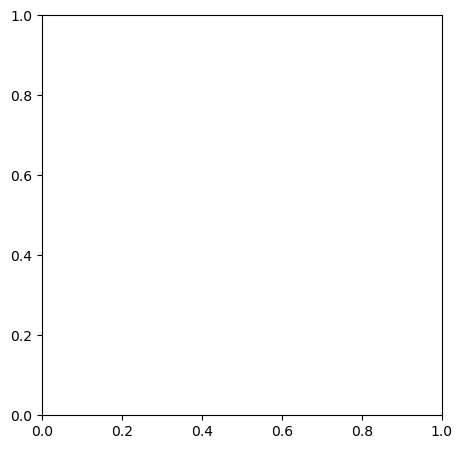

In [141]:
fig= plt.figure(figsize=(4,4), dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.lineplot(data=sos50.reset_index(drop=True),x="sos",y="logdiatos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiatos",color='orange')
# sns.lineplot(data=sos50.reset_index(drop=True),x="sos",y="logdiazos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiazos")
sns.lineplot(data=sos50.reset_index(drop=True),x="sos",y="logpicoos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phypicoos",color='red')
ax.set_ylabel("log Prediction")
ax.set_xlabel(r"salinity (psu)")
ax.set_title("NCAR CESM2\nSensitivity: Salinity")
# ax.set_xlim()
# fig.tight_layout(pad=1.0)
plt.legend()
plt.show()
fig.savefig(filepath + "cesm2_sos.jpg",bbox_inches='tight')

#### Sensitivity Analysis wo

In [ ]:
Xwo50 = Xs.copy(deep=True)
for col in Xs.columns:
    if col != 'wo':
        Xwo50[col] = Xwo50[col].quantile(q=0.5, interpolation='linear')
    else:
        Xwo50[col] = Xwo50[col]

In [ ]:
Xwo50.head(10)

In [ ]:
ydiatos_pred = model_diatos.predict(Xwo50)
rmse = mean_squared_error(ydiatos, ydiatos_pred, squared=False)
r2 = r2_score(ydiatos, ydiatos_pred)
print(rmse/ ydiatos.std())
print('RMSE phydiatos: ', rmse)
print('R2 Score phydiatos: ', r2)

In [ ]:
ydiazos_pred = model_diazos.predict(Xwo50)
rmse = mean_squared_error(ydiazos, ydiazos_pred, squared=False)
r2 = r2_score(ydiazos, ydiazos_pred)
print(rmse/ ydiazos.std())
print('RMSE phydiazos: ', rmse)
print('R2 Score phydiazos: ', r2)

In [ ]:
ypicoos_pred = model_picoos.predict(Xwo50)
rmse = mean_squared_error(ypicoos, ypicoos_pred, squared=False)
r2 = r2_score(ypicoos, ypicoos_pred)
print(rmse/ ypicoos.std())
print('RMSE phypicoos: ', rmse)
print('R2 Score phypicoos: ', r2)

In [ ]:
wo50 = X.copy(deep=True)
wo50["logdiatos_pred"] = ydiatos_pred
wo50["logdiazos_pred"] = ydiazos_pred
wo50["logpicoos_pred"] = ypicoos_pred
# wo50["wo_scaled"] = wo50["wo"] * 1e3

In [ ]:
wo50.head(10)

In [ ]:
# fig= plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_axes([0,0,1,1])
# sns.lineplot(data=wo50.reset_index(drop=True),x="wo",y="logdiatos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiatos",color='orange')
# # sns.lineplot(data=wo50.reset_index(drop=True),x=wo",y="logdiazos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phydiazos")
# sns.lineplot(data=wo50.reset_index(drop=True),x="wo",y="logpicoos_pred",ax=ax,estimator='mean',sort=True, err_style='band',label="phypicoos",color='red')
# ax.set_ylabel("log Prediction")
# ax.set_xlabel("vertical velocity (m/s)")
# ax.set_title("NCAR CESM2\nSensitivity: Upwelling")
# # ax.set_xlim()
# # fig.tight_layout(pad=1.0)
# plt.legend()
# plt.show()
# fig.savefig(filepath + "cesm2_wo.jpg",bbox_inches='tight')